# Data Dictionary
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# EDA

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
inp0 = pd.read_csv('day.csv')
inp0.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [52]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observation
* There are no missing values

## Update categorical values to categorical names

In [53]:
# convert numbers which represent categorical values to caetgorical names
def weathersit_map(x):
    return x.map({'1': 'clear', '2': 'mist', '3': 'snow', '4': 'rain'})

def season_map(x):
    return x.map({'1': 'spring', '2': 'summer', '3': 'fall', '4': 'winter'})

# this is necessary to avoid dtype casting warning
inp0[['weathersit', 'season']] = inp0[['weathersit', 'season']].astype('str')

inp0.loc[:, 'weathersit'] = inp0[['weathersit']].apply(weathersit_map)
inp0.loc[:, 'season'] = inp0[['season']].apply(season_map)

inp0.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        6           0   
1        2  02-01-2018  spring   0     1        0        0           0   
2        3  03-01-2018  spring   0     1        0        1           1   
3        4  04-01-2018  spring   0     1        0        2           1   
4        5  05-01-2018  spring   0     1        0        3           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [54]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


## checking for single unique value

In [55]:
# checking for single unique value
inp0.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

- there is no missing value
- there is no column with a single unique value

## derived metrics

In [56]:
# expanding dteday
inp0['dteday'] = pd.to_datetime(inp0['dteday'], format='%d-%m-%Y')
inp0['day_name'] = inp0['dteday'].dt.day_name()
inp0['day'] = inp0['dteday'].dt.day
inp0['month'] = inp0['dteday'].dt.month_name()

inp0.head(10)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01  spring   0     1        0        6           0   
1        2 2018-01-02  spring   0     1        0        0           0   
2        3 2018-01-03  spring   0     1        0        1           1   
3        4 2018-01-04  spring   0     1        0        2           1   
4        5 2018-01-05  spring   0     1        0        3           1   
5        6 2018-01-06  spring   0     1        0        4           1   
6        7 2018-01-07  spring   0     1        0        5           1   
7        8 2018-01-08  spring   0     1        0        6           0   
8        9 2018-01-09  spring   0     1        0        0           0   
9       10 2018-01-10  spring   0     1        0        1           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5      clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6       mist   8.057402  10.44195  49.8696  11.304642     148        1362   
7       mist   6.765000   8.11270  53.5833  17.875868      68         891   
8      clear   5.671653   5.80875  43.4167  24.250650      54         768   
9      clear   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt   day_name  day    month  
0   985     Monday    1  January  
1   801    Tuesday    2  January  
2  1349  Wednesday    3  January  
3  1562   Thursday    4  January  
4  1600     Friday    5  January  
5  1606   Saturday    6  January  
6  1510     Sunday    7  January  
7   959     Monday    8  January  
8   822    Tuesday    9  January  
9  1321  Wednesday   10  January

## verifying data for the column weekday

In [57]:
from datetime import datetime, timedelta
from_date = datetime(2019, 2, 26)
to_date = from_date + timedelta(weeks=2)
condition1 = inp0['dteday'] > from_date
condition2 = inp0['dteday'] < to_date
data = inp0[condition1 & condition2]
data

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
422      423 2019-02-27  spring   1     2        0        1           1   
423      424 2019-02-28  spring   1     2        0        2           1   
424      425 2019-03-01  spring   1     3        0        4           1   
425      426 2019-03-02  spring   1     3        0        5           1   
426      427 2019-03-03  spring   1     3        0        6           0   
427      428 2019-03-04  spring   1     3        0        0           0   
428      429 2019-03-05  spring   1     3        0        1           1   
429      430 2019-03-06  spring   1     3        0        2           1   
430      431 2019-03-07  spring   1     3        0        3           1   
431      432 2019-03-08  spring   1     3        0        4           1   
432      433 2019-03-09  spring   1     3        0        5           1   
433      434 2019-03-10  spring   1     3        0        6           0   
434      435 2019-03-11  spring   1     3        0        0           0   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
422      clear  15.033347  17.89770  49.0833  17.958211     253        4069   
423      clear  14.725847  17.67625  39.5833  12.958939     229        4134   
424      clear  19.919153  23.76855  61.5417  15.208129     325        4665   
425       mist  14.486653  17.99210  65.7083   9.708568     246        2948   
426       mist  16.980847  20.67460  62.1250  10.792293     956        3110   
427      clear  13.359153  15.15105  40.3333  22.416257     710        2713   
428      clear   9.976653  12.05855  50.6250  15.333486     203        3130   
429      clear  10.591653  12.75210  45.6667  13.458625     221        3735   
430      clear  16.570847  19.25500  51.3333  23.167193     432        4484   
431      clear  21.627500  26.23020  56.7500  29.584721     486        4896   
432       mist  16.844153  19.85415  40.7083  27.791600     447        4122   
433      clear  11.787500  13.88835  35.0417  15.125250     968        3150   
434      clear  14.831299  17.98350  47.6957  14.913329    1658        3253   

      cnt   day_name  day     month  
422  4322  Wednesday   27  February  
423  4363   Thursday   28  February  
424  4990     Friday    1     March  
425  3194   Saturday    2     March  
426  4066     Sunday    3     March  
427  3423     Monday    4     March  
428  3333    Tuesday    5     March  
429  3956  Wednesday    6     March  
430  4916   Thursday    7     March  
431  5382     Friday    8     March  
432  4569   Saturday    9     March  
433  4118     Sunday   10     March  
434  4911     Monday   11     March

### observations
- it seems like weekday column was meant to work with leap years and hence there is a missing value after 28th feb 2019 where there is a jump of weekday from 2 to 4.
- since we will use `day_name` as the categorical value representing the week, we will drop `weekday` eventually.

## dropping less useful columns

In [58]:
# dropping instant and dteday as they are completely unique values
# dropping mnth and weekday in favour of categorical columns month and day_name
# dropping casual and registered as they are not predictor variables
inp1 = inp0.drop(columns=['instant', 'dteday', 'mnth', 'weekday', 'casual', 'registered'])
inp1.head()

season  yr  holiday  workingday weathersit       temp     atemp      hum  \
0  spring   0        0           0       mist  14.110847  18.18125  80.5833   
1  spring   0        0           0       mist  14.902598  17.68695  69.6087   
2  spring   0        0           1      clear   8.050924   9.47025  43.7273   
3  spring   0        0           1      clear   8.200000  10.60610  59.0435   
4  spring   0        0           1      clear   9.305237  11.46350  43.6957   

   windspeed   cnt   day_name  day    month  
0  10.749882   985     Monday    1  January  
1  16.652113   801    Tuesday    2  January  
2  16.636703  1349  Wednesday    3  January  
3  10.739832  1562   Thursday    4  January  
4  12.522300  1600     Friday    5  January

## univariate analysis
- finding outliers in numerical columns

In [59]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
inp1[num_vars].describe()

temp       atemp         hum   windspeed          cnt
count  730.000000  730.000000  730.000000  730.000000   730.000000
mean    20.319259   23.726322   62.765175   12.763620  4508.006849
std      7.506729    8.150308   14.237589    5.195841  1936.011647
min      2.424346    3.953480    0.000000    1.500244    22.000000
25%     13.811885   16.889713   52.000000    9.041650  3169.750000
50%     20.465826   24.368225   62.625000   12.125325  4548.500000
75%     26.880615   30.445775   72.989575   15.625589  5966.000000
max     35.328347   42.044800   97.250000   34.000021  8714.000000

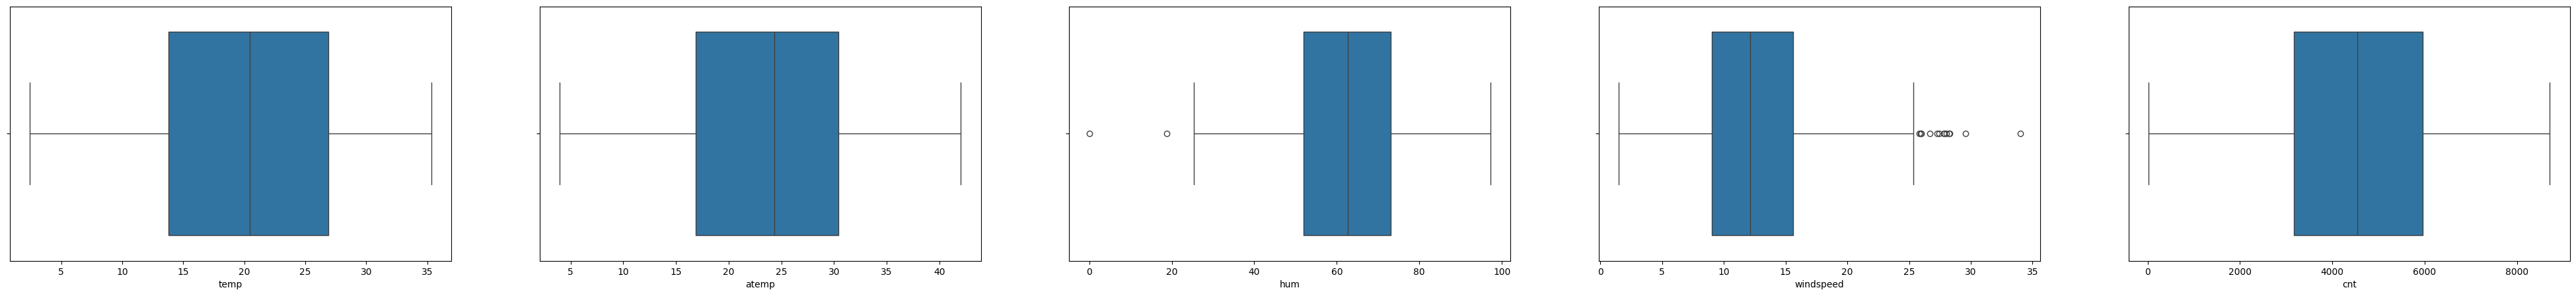

In [60]:
fig, axes = plt.subplots(nrows = 1, ncols=5, figsize = (50,5))

sns.boxplot(data=inp1, x='temp', ax=axes[0])
sns.boxplot(data=inp1, x='atemp', ax=axes[1])
sns.boxplot(data=inp1, x='hum', ax=axes[2])
sns.boxplot(data=inp1, x='windspeed', ax=axes[3])
sns.boxplot(data=inp1, x='cnt', ax=axes[4])
plt.show()

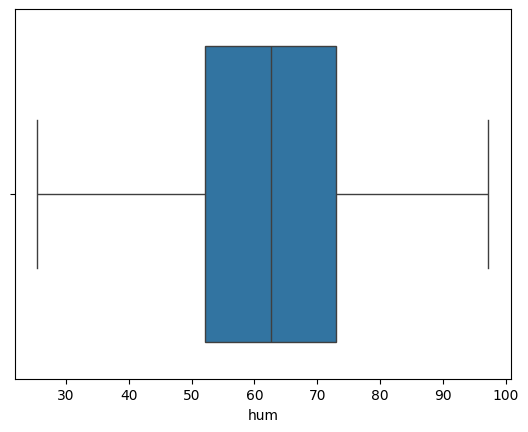

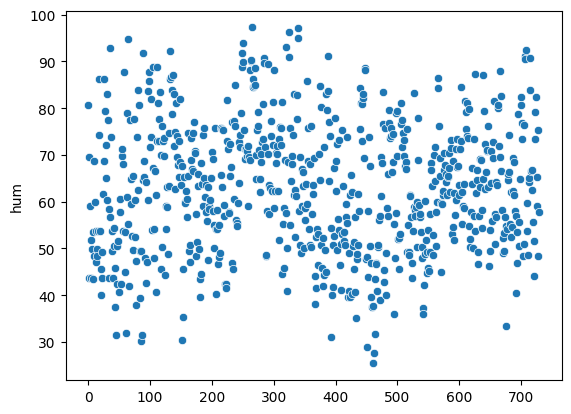

In [61]:
a_col = 'hum'
# condition = inp1[a_col] < inp1[a_col].quantile(0.9)
condition2 = inp1[a_col] > 18.8
data = inp1[condition2].copy()
sns.boxplot(data=data, x=a_col)
plt.show()
sns.scatterplot(data[a_col])
plt.show()

In [62]:
# on quantile inspection, we found that there are only 2 values which are outliers and both have humidity value < 20
inp1[inp1['hum'] < 20]

season  yr  holiday  workingday weathersit       temp    atemp      hum  \
49  spring   0        0           0      clear  16.365847  19.5702  18.7917   
68  spring   0        0           1       snow  15.952731  19.2834   0.0000   

    windspeed   cnt  day_name  day     month  
49  34.000021  1635    Monday   19  February  
68  17.545759   623  Saturday   10     March

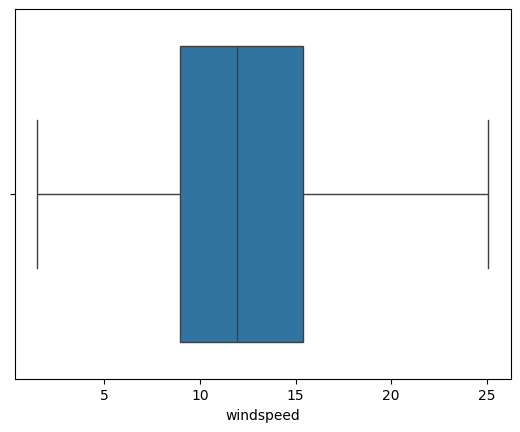

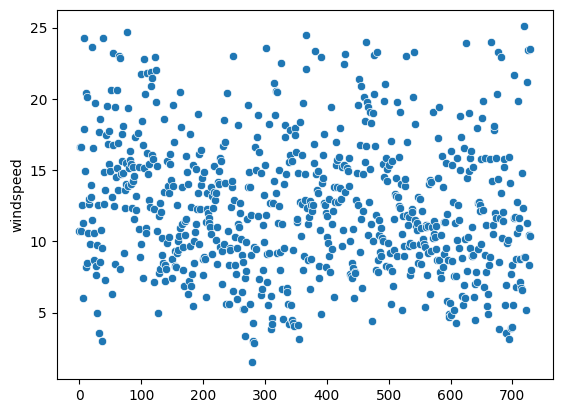

In [63]:
a_col = 'windspeed'
condition = inp1[a_col] < inp1[a_col].quantile(0.979)
data = inp1[condition].copy()
sns.boxplot(data=data, x=a_col)
plt.show()
sns.scatterplot(data[a_col])
plt.show()

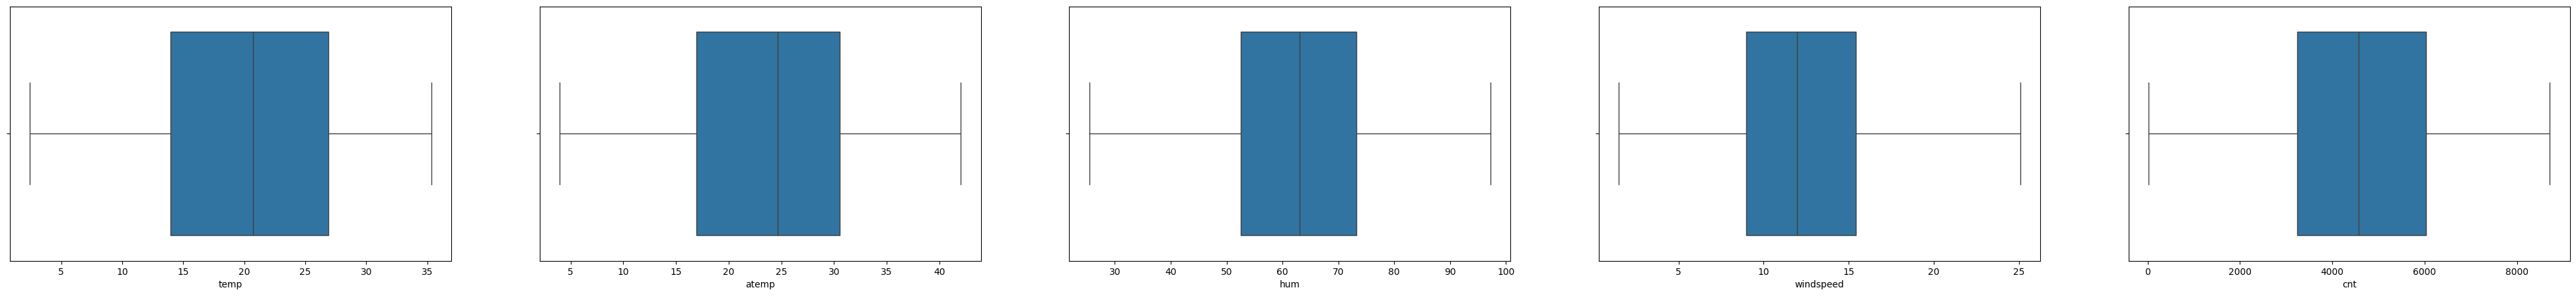

inp1 rows = 730, inp2 rows = 713, data loss = 2.33%


In [64]:
# we remove outliers from humidity and windspeed
condition1 = inp1['hum'] > 18.8
condition2 = inp1['windspeed'] < inp1['windspeed'].quantile(0.979)
inp2 = inp1[condition1 & condition2]

fig, axes = plt.subplots(nrows = 1, ncols=5, figsize = (50,5))

sns.boxplot(data=inp2, x='temp', ax=axes[0])
sns.boxplot(data=inp2, x='atemp', ax=axes[1])
sns.boxplot(data=inp2, x='hum', ax=axes[2])
sns.boxplot(data=inp2, x='windspeed', ax=axes[3])
sns.boxplot(data=inp2, x='cnt', ax=axes[4])
plt.show()

print(f'inp1 rows = {inp1.shape[0]}, inp2 rows = {inp2.shape[0]}, data loss = {round((inp1.shape[0] - inp2.shape[0])*100/inp1.shape[0], 2)}%')

### observations
- we have removed the outliers with a 2.33% of data loss. our data set looks good

## Bivariate analysis

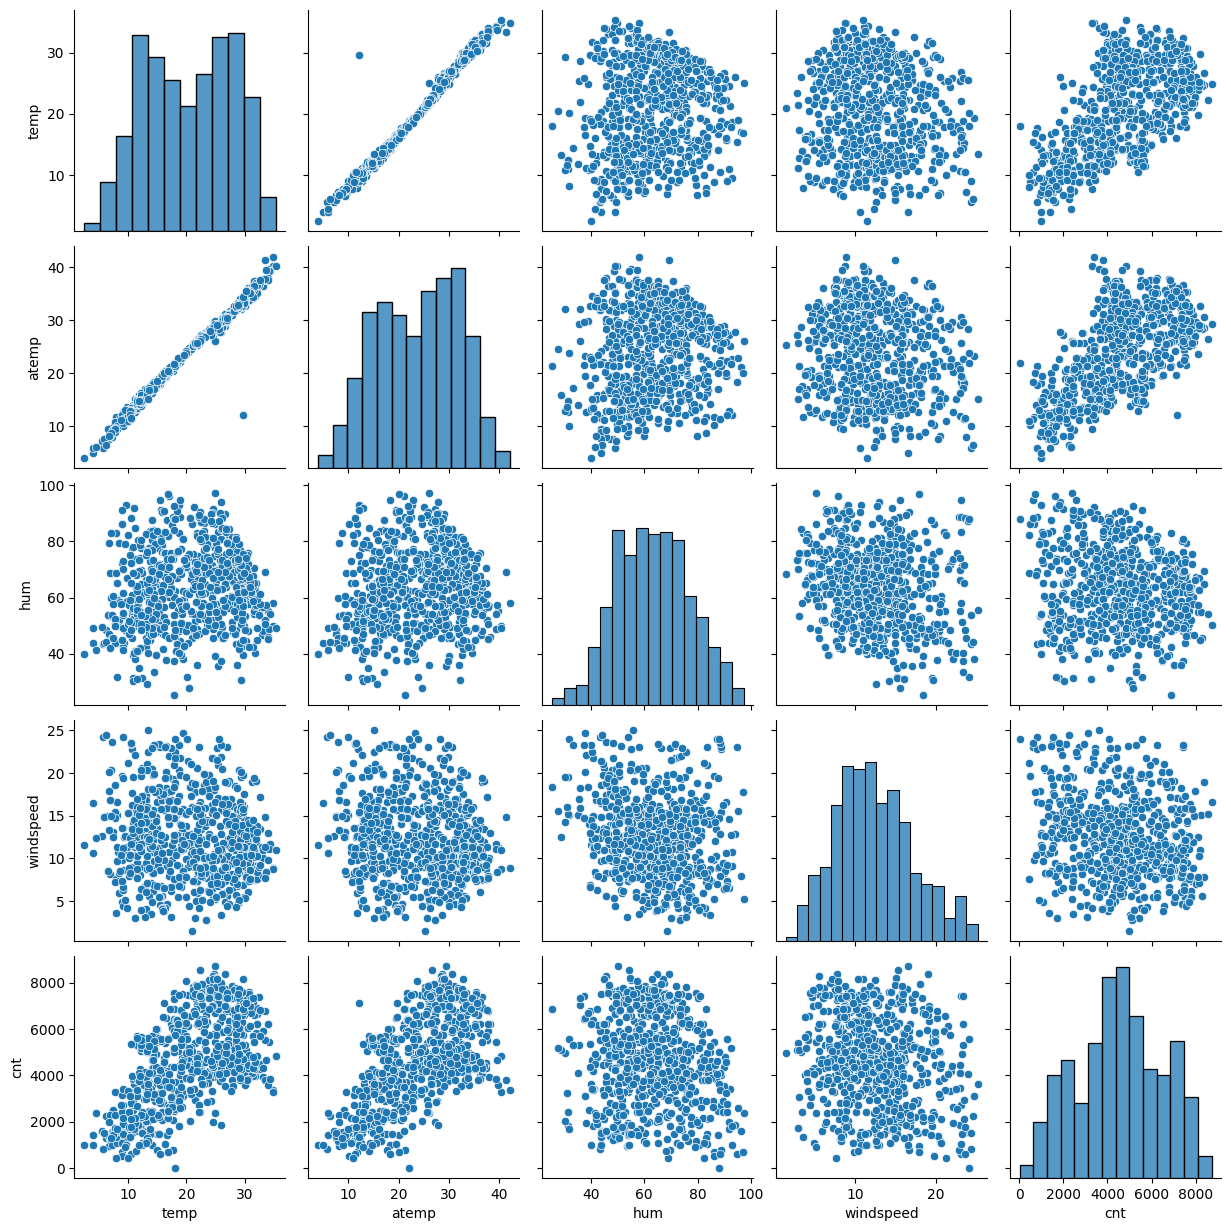

In [65]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(inp2[num_vars])
plt.show()

### observations
- `temp` and `atemp` have high positive correlation
- `temp` and `atemp` have good positive correlation with `cnt`

## segmented univariate, let's see distribution of `cnt` over various categorical columns

In [66]:
inp2.head(10)

season  yr  holiday  workingday weathersit       temp     atemp      hum  \
0  spring   0        0           0       mist  14.110847  18.18125  80.5833   
1  spring   0        0           0       mist  14.902598  17.68695  69.6087   
2  spring   0        0           1      clear   8.050924   9.47025  43.7273   
3  spring   0        0           1      clear   8.200000  10.60610  59.0435   
4  spring   0        0           1      clear   9.305237  11.46350  43.6957   
5  spring   0        0           1      clear   8.378268  11.66045  51.8261   
6  spring   0        0           1       mist   8.057402  10.44195  49.8696   
7  spring   0        0           0       mist   6.765000   8.11270  53.5833   
8  spring   0        0           0      clear   5.671653   5.80875  43.4167   
9  spring   0        0           1      clear   6.184153   7.54440  48.2917   

   windspeed   cnt   day_name  day    month  
0  10.749882   985     Monday    1  January  
1  16.652113   801    Tuesday    2  January  
2  16.636703  1349  Wednesday    3  January  
3  10.739832  1562   Thursday    4  January  
4  12.522300  1600     Friday    5  January  
5   6.000868  1606   Saturday    6  January  
6  11.304642  1510     Sunday    7  January  
7  17.875868   959     Monday    8  January  
8  24.250650   822    Tuesday    9  January  
9  14.958889  1321  Wednesday   10  January

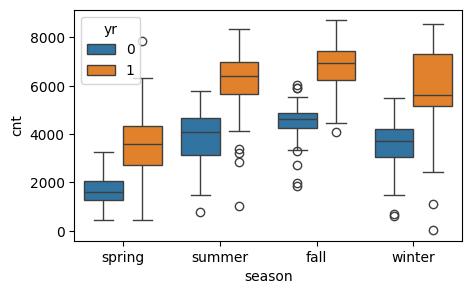

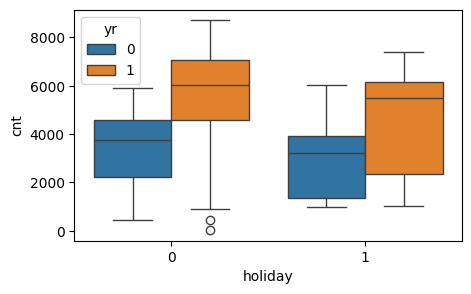

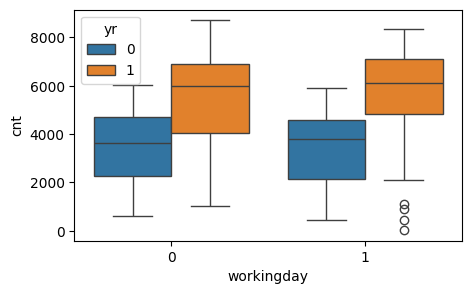

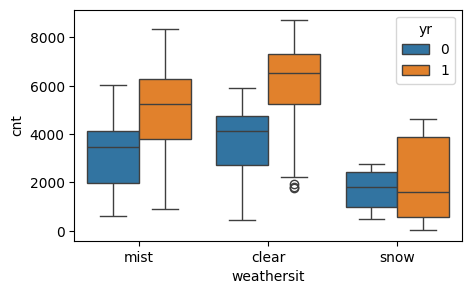

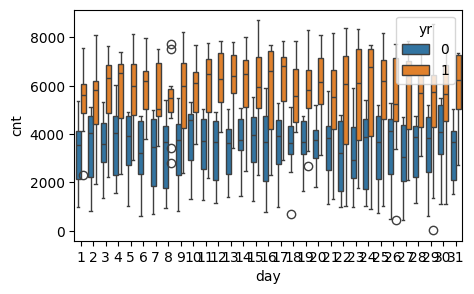

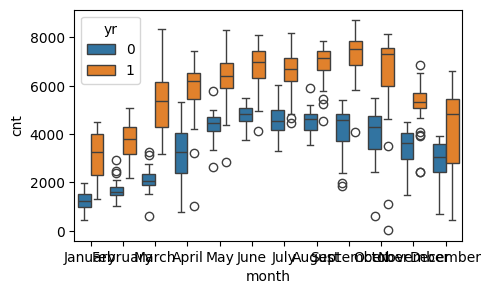

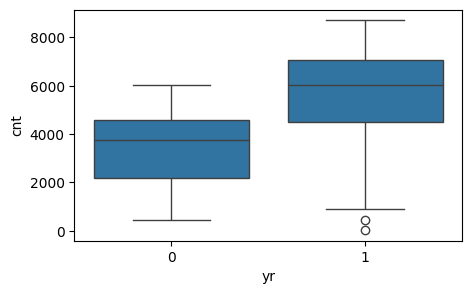

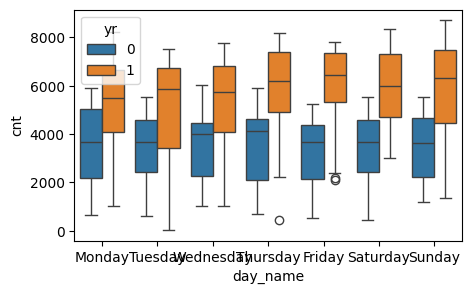

In [67]:
cat_cols = ['season', 'holiday', 'workingday', 'weathersit', 'day', 'month', 'yr', 'day_name']

plt.figure(figsize=(5,3))
sns.boxplot(data=inp2, x='season', y='cnt', hue='yr')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=inp2, x='holiday', y='cnt', hue='yr')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=inp2, x='workingday', y='cnt', hue='yr')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=inp2, x='weathersit', y='cnt', hue='yr')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=inp2, x='day', y='cnt', hue='yr')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=inp2, x='month', y='cnt', hue='yr')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=inp2, x='yr', y='cnt')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=inp2, x='day_name', y='cnt', hue='yr')
plt.show()


In [68]:
inp2['yr'].value_counts()

yr
0    358
1    355
Name: count, dtype: int64

### observations
- It's very evident that 2019 had more bike rentals than 2018
- we should pull equal proportions of train/test data from both the years. We can not let our train/test data to be biased by years.
- expanding day column to 31 columns will be a huge exercise, we will consider this if we are not able to predict anything from the remaining columns.

In [69]:
inp3 = inp2.drop(columns=['day'])
inp3.head()

season  yr  holiday  workingday weathersit       temp     atemp      hum  \
0  spring   0        0           0       mist  14.110847  18.18125  80.5833   
1  spring   0        0           0       mist  14.902598  17.68695  69.6087   
2  spring   0        0           1      clear   8.050924   9.47025  43.7273   
3  spring   0        0           1      clear   8.200000  10.60610  59.0435   
4  spring   0        0           1      clear   9.305237  11.46350  43.6957   

   windspeed   cnt   day_name    month  
0  10.749882   985     Monday  January  
1  16.652113   801    Tuesday  January  
2  16.636703  1349  Wednesday  January  
3  10.739832  1562   Thursday  January  
4  12.522300  1600     Friday  January

# data preparation
- get dummies for season, month, weathersit, day_name

## create dummy variables

In [70]:
season = pd.get_dummies(inp3['season'], drop_first=True, dtype=int)
season.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [71]:
month = pd.get_dummies(inp3['month'], drop_first=True, dtype=int)
month.head()

August  December  February  January  July  June  March  May  November  \
0       0         0         0        1     0     0      0    0         0   
1       0         0         0        1     0     0      0    0         0   
2       0         0         0        1     0     0      0    0         0   
3       0         0         0        1     0     0      0    0         0   
4       0         0         0        1     0     0      0    0         0   

   October  September  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0

In [72]:
weathersit = pd.get_dummies(inp3['weathersit'], drop_first=True, dtype=int)
weathersit.head()

mist  snow
0     1     0
1     1     0
2     0     0
3     0     0
4     0     0

In [73]:
day_name = pd.get_dummies(inp3['day_name'], drop_first=True, dtype=int)
day_name.head()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       1         0       0         0        0          0
1       0         0       0         0        1          0
2       0         0       0         0        0          1
3       0         0       0         1        0          0
4       0         0       0         0        0          0

In [74]:
inp4 = pd.concat([inp3, season, month, weathersit, day_name], axis=1)
inp4.head()

season  yr  holiday  workingday weathersit       temp     atemp      hum  \
0  spring   0        0           0       mist  14.110847  18.18125  80.5833   
1  spring   0        0           0       mist  14.902598  17.68695  69.6087   
2  spring   0        0           1      clear   8.050924   9.47025  43.7273   
3  spring   0        0           1      clear   8.200000  10.60610  59.0435   
4  spring   0        0           1      clear   9.305237  11.46350  43.6957   

   windspeed   cnt  ... October September  mist  snow  Monday  Saturday  \
0  10.749882   985  ...       0         0     1     0       1         0   
1  16.652113   801  ...       0         0     1     0       0         0   
2  16.636703  1349  ...       0         0     0     0       0         0   
3  10.739832  1562  ...       0         0     0     0       0         0   
4  12.522300  1600  ...       0         0     0     0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         0        0          0  
1       0         0        1          0  
2       0         0        0          1  
3       0         1        0          0  
4       0         0        0          0  

[5 rows x 34 columns]

In [75]:
inp5 = inp4.drop(columns=['season', 'month', 'weathersit', 'day_name'])
inp5.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  ...  October  September  mist  snow  Monday  Saturday  \
0       1       0  ...        0          0     1     0       1         0   
1       1       0  ...        0          0     1     0       0         0   
2       1       0  ...        0          0     0     0       0         0   
3       1       0  ...        0          0     0     0       0         0   
4       1       0  ...        0          0     0     0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         0        0          0  
1       0         0        1          0  
2       0         0        0          1  
3       0         1        0          0  
4       0         0        0          0  

[5 rows x 30 columns]

# import linear regression libraries

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

# train test split

In [77]:
# we want to pull equal proportion of data for both 2018 and 2019 since we don't want a bias towards a particular year in the training dataset.
df_train, df_test = train_test_split(inp5, train_size=0.7, random_state=100, stratify=inp5['yr'])
print(f'df_train shape = {df_train.shape}')
print(f'df_test shape = {df_test.shape}')
print(df_train['yr'].value_counts(normalize=True))
print(df_test['yr'].value_counts(normalize=True))

df_train shape = (499, 30)
df_test shape = (214, 30)
yr
0    0.503006
1    0.496994
Name: proportion, dtype: float64
yr
1    0.5
0    0.5
Name: proportion, dtype: float64


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 475 to 152
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          499 non-null    int64  
 1   holiday     499 non-null    int64  
 2   workingday  499 non-null    int64  
 3   temp        499 non-null    float64
 4   atemp       499 non-null    float64
 5   hum         499 non-null    float64
 6   windspeed   499 non-null    float64
 7   cnt         499 non-null    int64  
 8   spring      499 non-null    int64  
 9   summer      499 non-null    int64  
 10  winter      499 non-null    int64  
 11  August      499 non-null    int64  
 12  December    499 non-null    int64  
 13  February    499 non-null    int64  
 14  January     499 non-null    int64  
 15  July        499 non-null    int64  
 16  June        499 non-null    int64  
 17  March       499 non-null    int64  
 18  May         499 non-null    int64  
 19  November    499 non-null    int6

# scaling

In [79]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
475   1        0           0  0.646640  0.608868  0.575703   0.740443   
174   0        0           1  0.841779  0.758064  0.415140   0.551523   
295   0        0           0  0.458886  0.450580  0.661172   0.175559   
391   1        0           1  0.463105  0.441457  0.661172   0.921746   
183   0        0           0  0.832286  0.773805  0.575092   0.572492   

          cnt  spring  summer  ...  October  September  mist  snow  Monday  \
475  0.759549       0       1  ...        0          0     0     0       0   
174  0.571675       0       0  ...        0          0     0     0       0   
295  0.501496       0       0  ...        1          0     0     0       0   
391  0.395076       1       0  ...        0          0     1     0       0   
183  0.532329       0       0  ...        0          0     1     0       0   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
475         0       1         0        0          0  
174         0       1         0        0          0  
295         0       0         0        1          0  
391         0       1         0        0          0  
183         0       0         0        1          0  

[5 rows x 30 columns]

# correlation heatmap

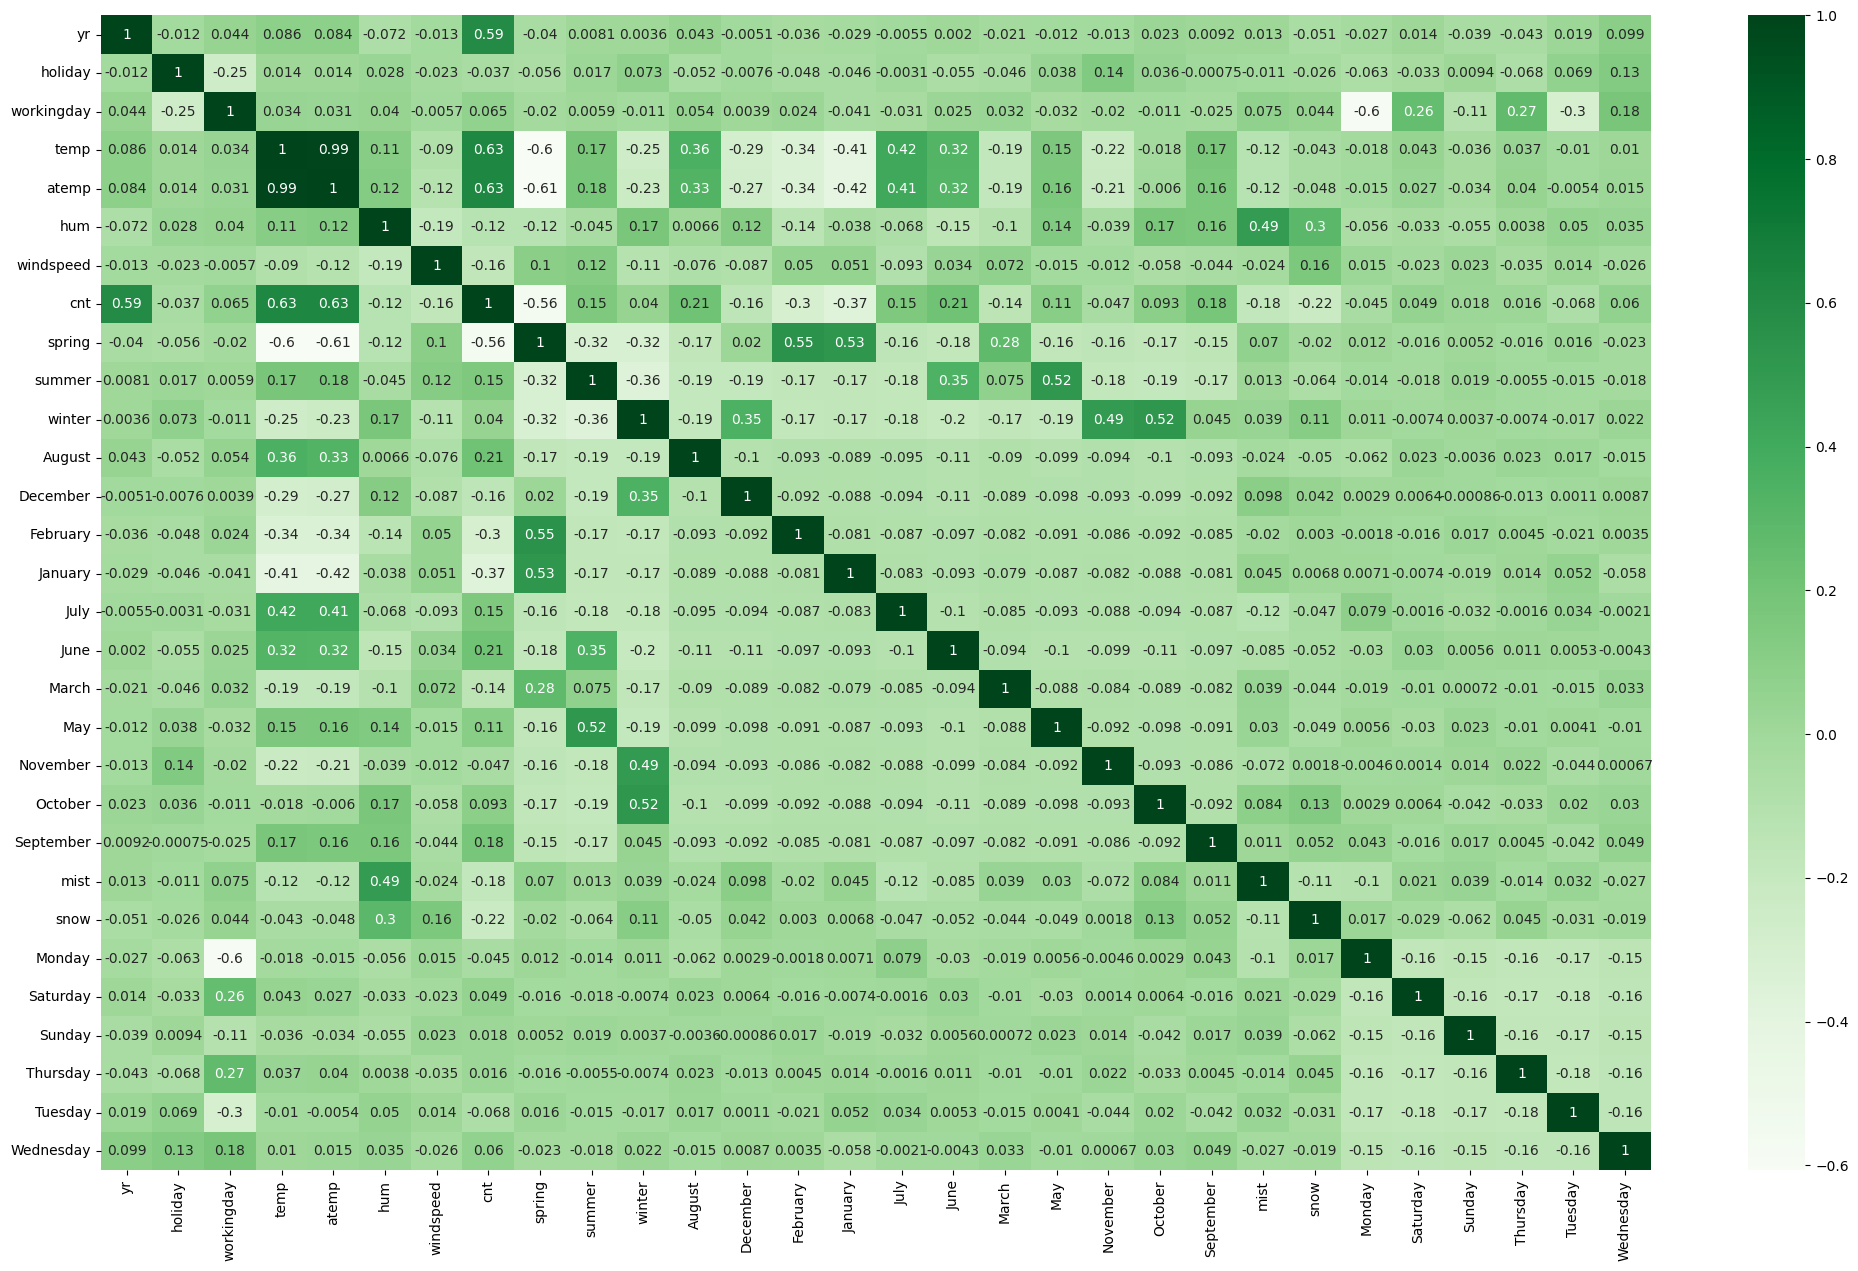

In [81]:
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(), cmap='Greens', annot=True)
plt.show()

# modeling

## reusable functions to create model and display linear regression assumptions

In [82]:
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

def get_rfe(df_train, y_var, n_features_to_select):
    estimator=LinearRegression()
    selector = RFE(estimator=estimator, n_features_to_select=n_features_to_select)

    X_train = df_train.drop(columns=[y_var])
    y_train = df_train[y_var]
    selector = selector.fit(X_train, y_train)
    selected_features = X_train.columns[selector.support_]
    return selected_features

def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return vif

# get the train test split from the original dataframe
# df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

def get_model(df_train, df_test, X_var_list, y_var):

    # feature selection
    X_train = df_train[X_var_list]
    y_train = df_train[y_var]

    X_test = df_test[X_var_list]
    y_test = df_test[y_var]

    # modeling
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(np.array(y_train), X_train_sm).fit()
    print(model.summary())

    # check multicolinearity
    vif = get_vif(X_train)

    # residual analysis
    X_train_sm = X_train_sm
    y_train_pred = model.predict(X_train_sm)

    # prediction
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = model.predict(X_test_sm)

    # model validation
    # sns.scatterplot(x=y_test, y=y_test_pred)

    # scoring
    train_score = r2_score(y_true=y_train, y_pred=y_train_pred)
    test_score = r2_score(y_true=y_test, y_pred=y_test_pred)

    print('MAE:', round(metrics.mean_absolute_error(y_test, y_test_pred),3))
    print('MSE:', round(metrics.mean_squared_error(y_test,  y_test_pred),3))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test,  y_test_pred))))

    draw_model_outcomes(vif, y_train, y_train_pred, y_test, y_test_pred, train_score, test_score)

    return model


def draw_model_outcomes(vif_df, y_train, y_train_pred, y_test, y_test_pred, train_score, test_score):
    fig, axes = plt.subplots(nrows = 2, ncols=4, figsize = (25,15))

    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    sns.kdeplot(residuals_train, ax=axes[0][0])
    axes[0][0].set_title('Residual analysis, kdeplot, normal distribution is good')
    axes[0][0].set_xlabel('residual')
    axes[0][0].set_ylabel('frequency')

    sm.qqplot(residuals_train, line='s', ax=axes[0][1])
    axes[0][1].set_title('Residual analysis, QQ Plot')
    axes[0][1].set_xlabel('Theoretical Quantiles (z-scores)')
    axes[0][1].set_ylabel('Residual Quantiles (z-scores)')

    sns.scatterplot(x=[i for i in range(1, residuals_train.size+1, 1)], y=residuals_train, ax=axes[0][2])
    axes[0][2].set_title('Homoscedasticity, non funnel, horizontal band is good')
    axes[0][2].set_xlabel('index')
    axes[0][2].set_ylabel('residual')

    sns.scatterplot(x=y_test_pred, y=residuals_test, ax=axes[0][3])
    axes[0][3].set_title('Independence check, no clear pattern is good')
    axes[0][3].set_xlabel('fitted value aka y_pred')
    axes[0][3].set_ylabel('residuals')

    sns.scatterplot(x=y_test, y=y_test_pred, ax=axes[1][0])
    axes[1][0].set_title('Model validation, positive strong correlation is good')
    axes[1][0].set_xlabel('y_test')
    axes[1][0].set_ylabel('y_test_pred')

    sns.scatterplot(x=y_train, y=y_train_pred, ax=axes[1][1])
    axes[1][1].set_title('Model validation, positive strong correlation is good')
    axes[1][1].set_xlabel('y_train')
    axes[1][1].set_ylabel('y_train_pred')

    ax = sns.barplot(data=vif_df, x='Features', y='VIF', ax=axes[1][2])
    axes[1][2].set_title('MultiColinearity Check, <5 is good')
    axes[1][2].set_xlabel('Features')
    plt.setp(axes[1][2].get_xticklabels(), rotation=90)
    axes[1][2].set_ylabel('VIF')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',  # Format to two decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha='center', va='baseline', fontsize=12, color='black', rotation=90)
        
    score = pd.DataFrame([{'dataset': 'train', 'score': train_score},{'dataset': 'test', 'score': test_score}])
    ax = sns.barplot(data=score, x='dataset', y='score', ax=axes[1][3])
    axes[1][3].set_title('Model validation, R2 Scores')
    axes[1][3].set_xlabel('dataset')
    axes[1][3].set_ylabel('score')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',  # Format to two decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha='center', va='baseline', fontsize=12, color='black', rotation=90)

    plt.show()

In [83]:
print(df_train.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'mist', 'snow', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')


## rfe to choose 20 variables out of all variables

In [84]:
X_var_list = get_rfe(df_train, 'cnt', 20)

In [85]:
print(X_var_list)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'December', 'January', 'July', 'May', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object')


## modeling together with residual analysis and model evaluation

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.60e-176
Time:                        23:37:51   Log-Likelihood:                 498.27
No. Observations:                 499   AIC:                            -954.5
Df Residuals:                     478   BIC:                            -866.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3371      0.030     11.261      0.0

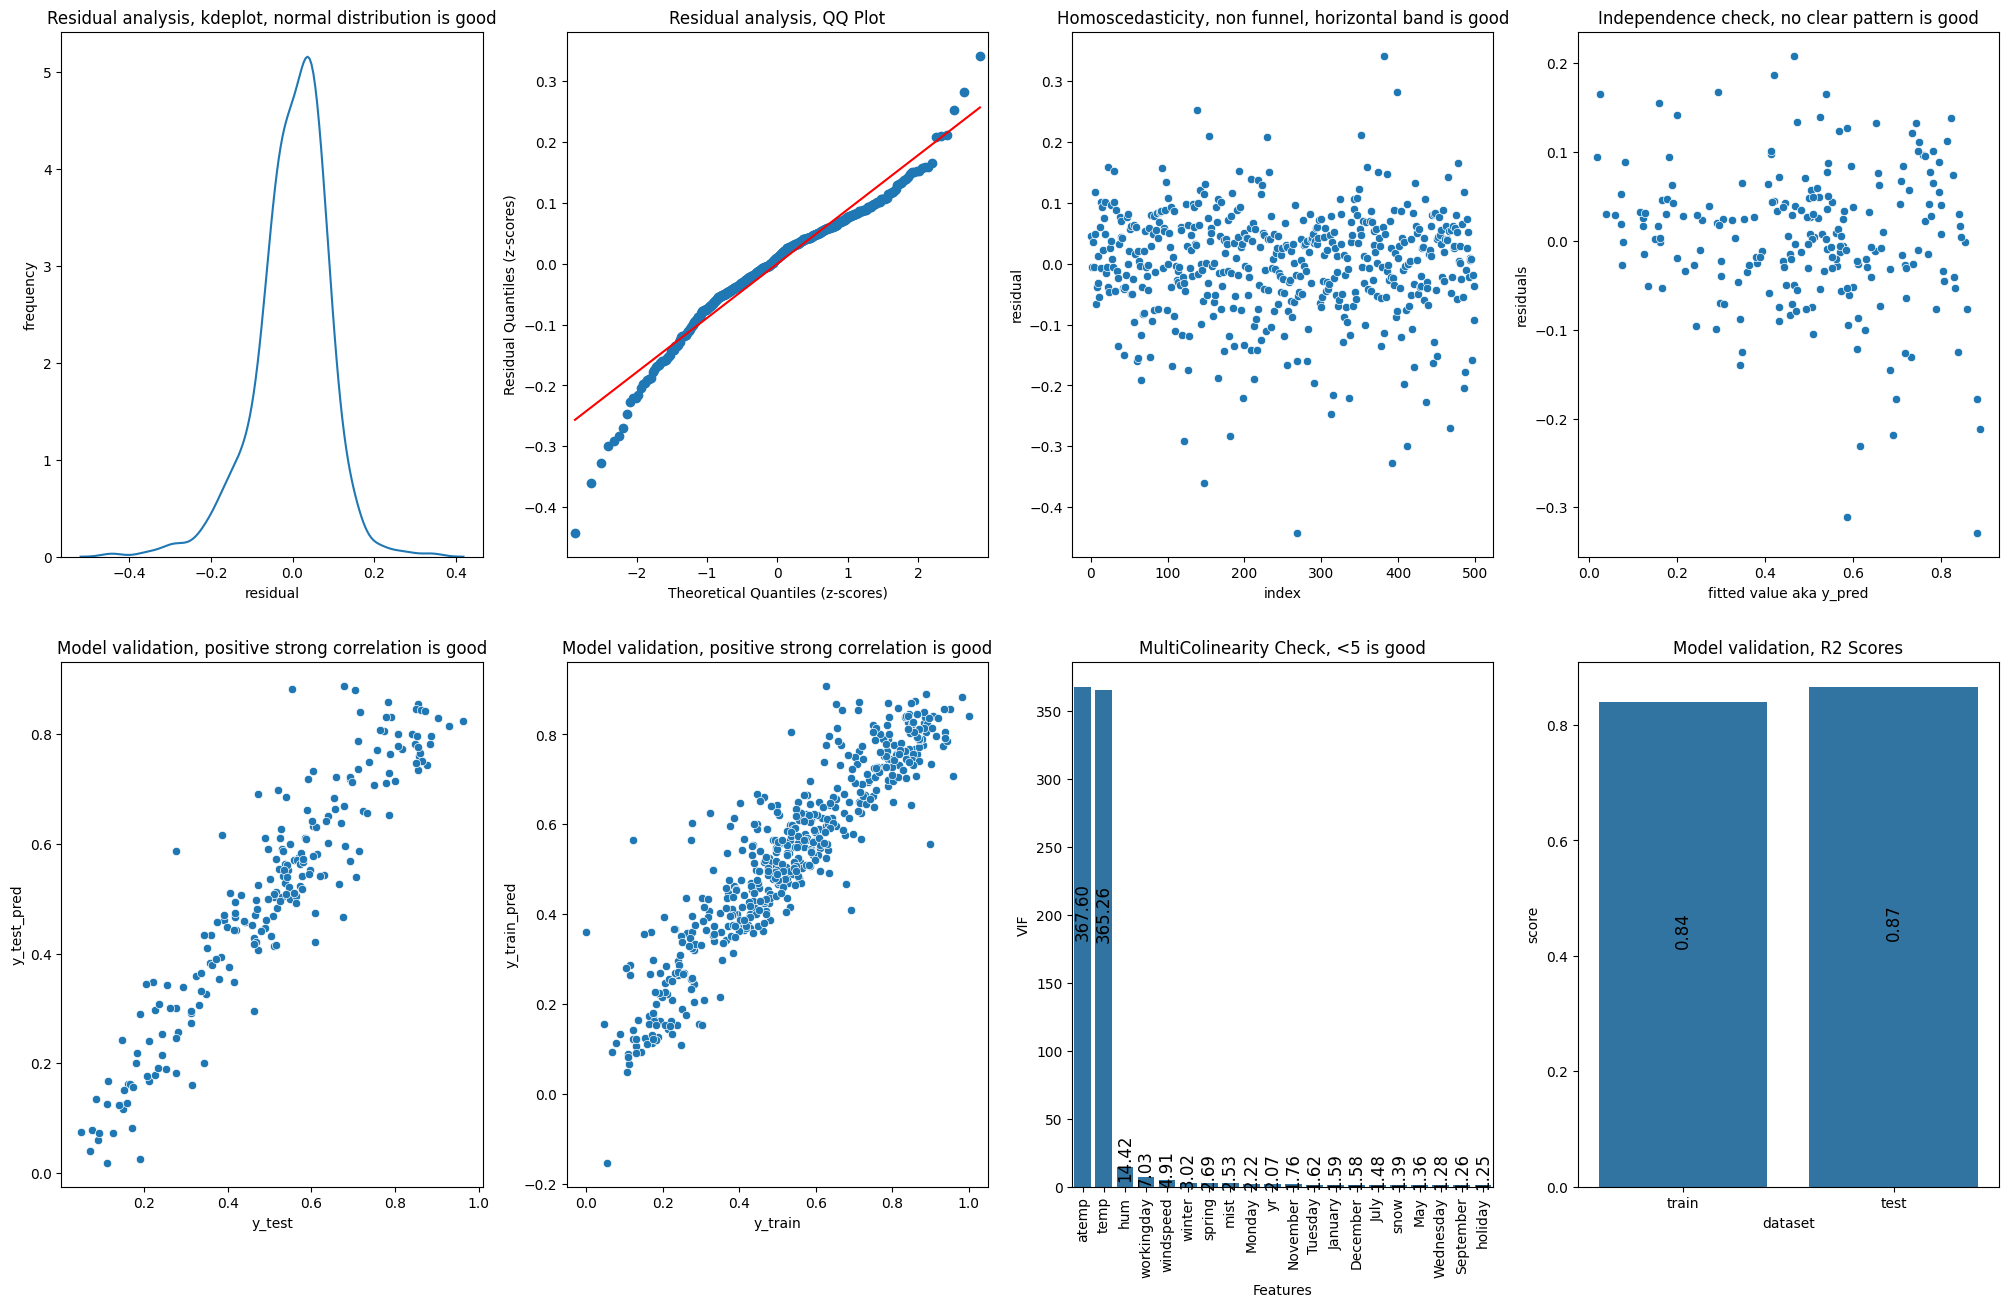

In [98]:
X_var_list = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'December', 'January', 'July', 'May', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday', 'Wednesday']

y_var = 'cnt'

m1 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     132.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.77e-177
Time:                        23:38:03   Log-Likelihood:                 498.07
No. Observations:                 499   AIC:                            -956.1
Df Residuals:                     479   BIC:                            -871.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3389      0.030     11.380      0.0

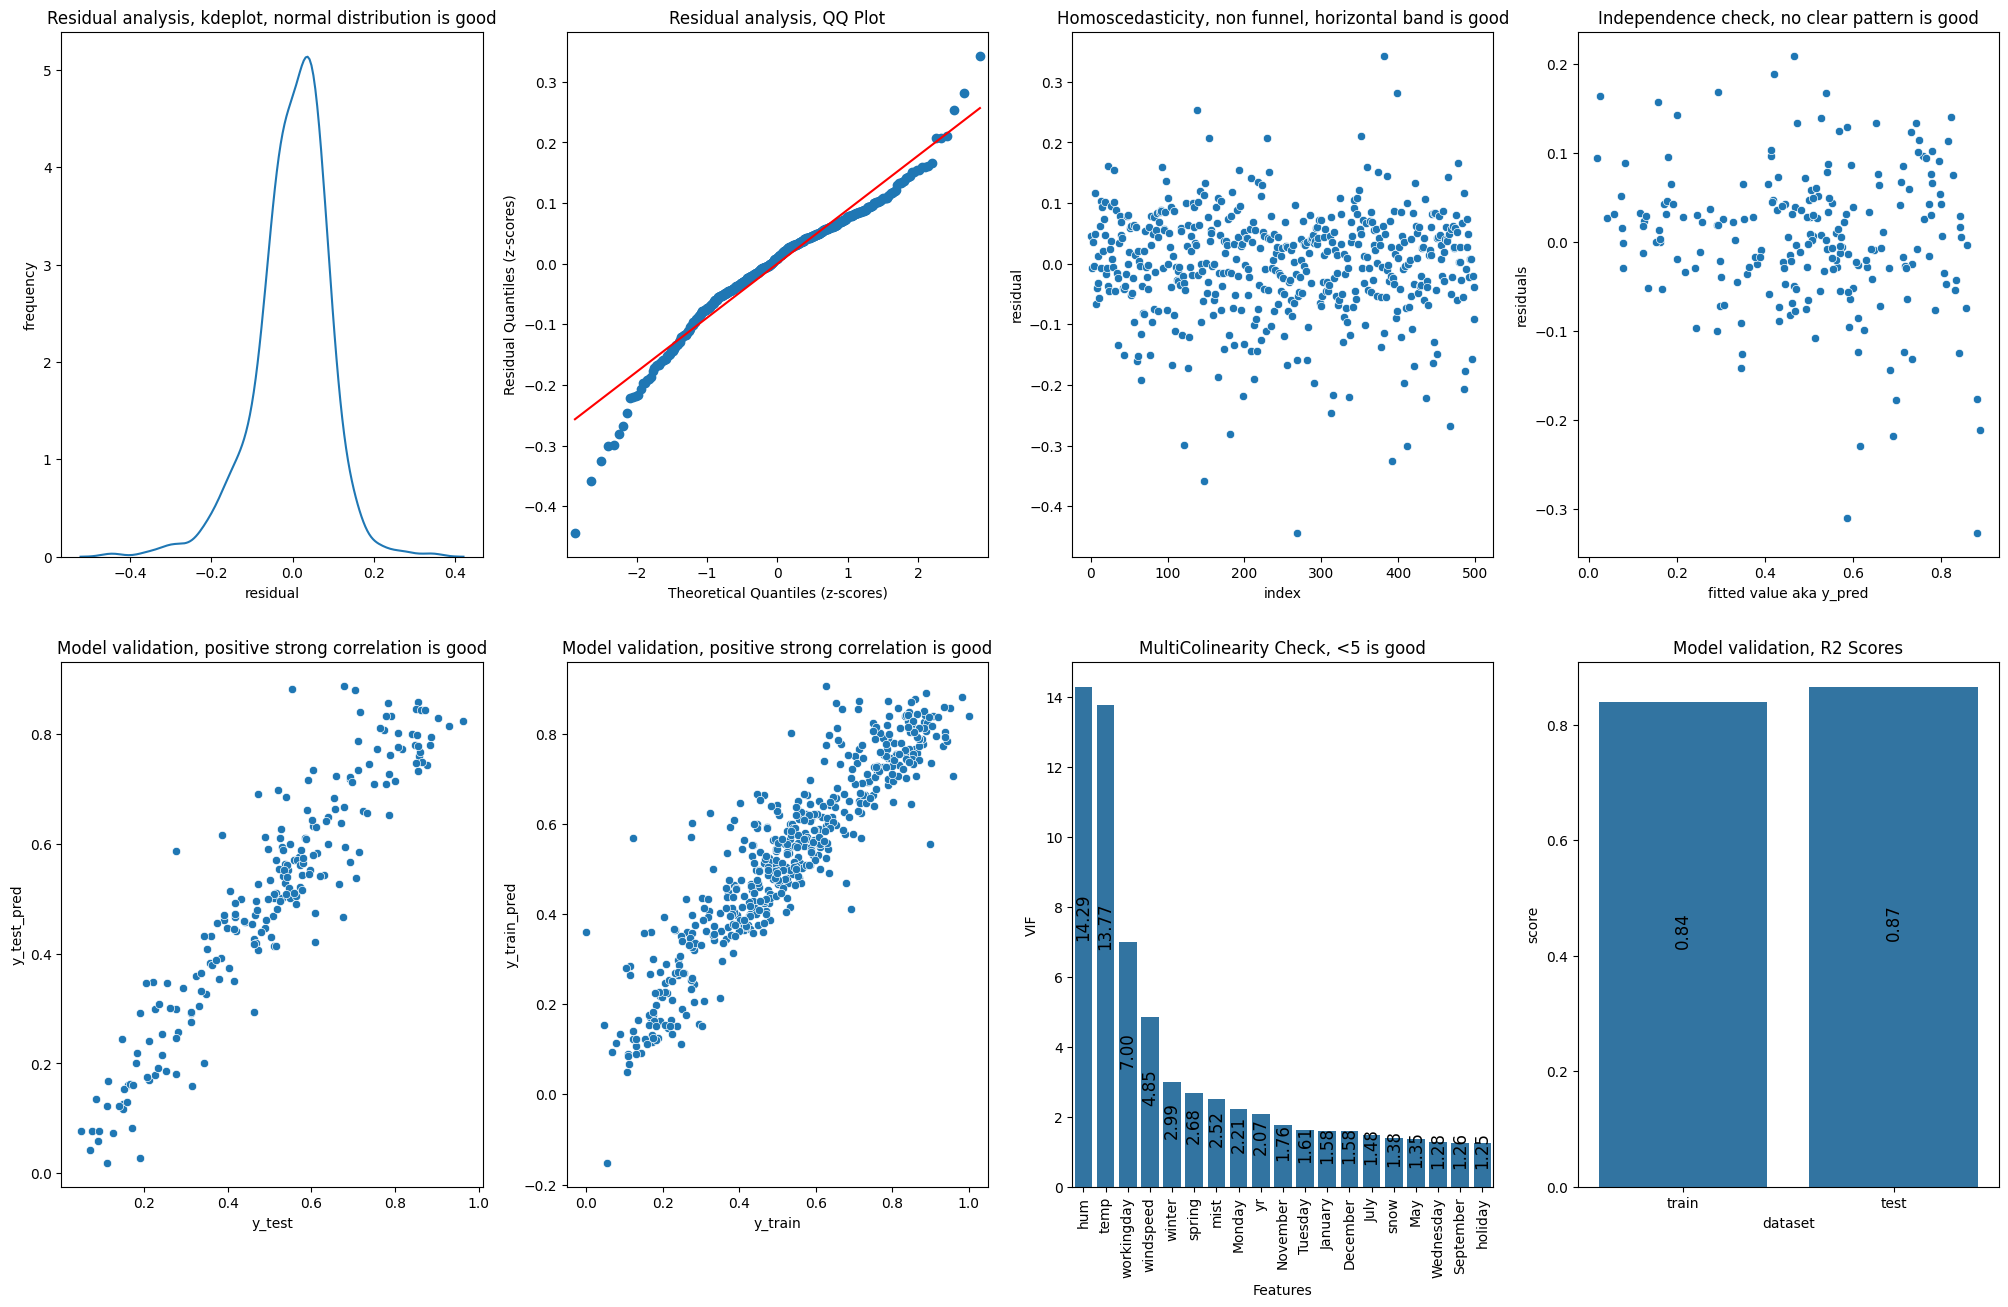

In [99]:
# removing atemp. p-value = 0.553, vif = 372.81
X_var_list = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'winter', 'December', 'January', 'July', 'May', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday', 'Wednesday']

y_var = 'cnt'

m2 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     139.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.44e-177
Time:                        23:38:14   Log-Likelihood:                 496.92
No. Observations:                 499   AIC:                            -955.8
Df Residuals:                     480   BIC:                            -875.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3205      0.027     11.816      0.0

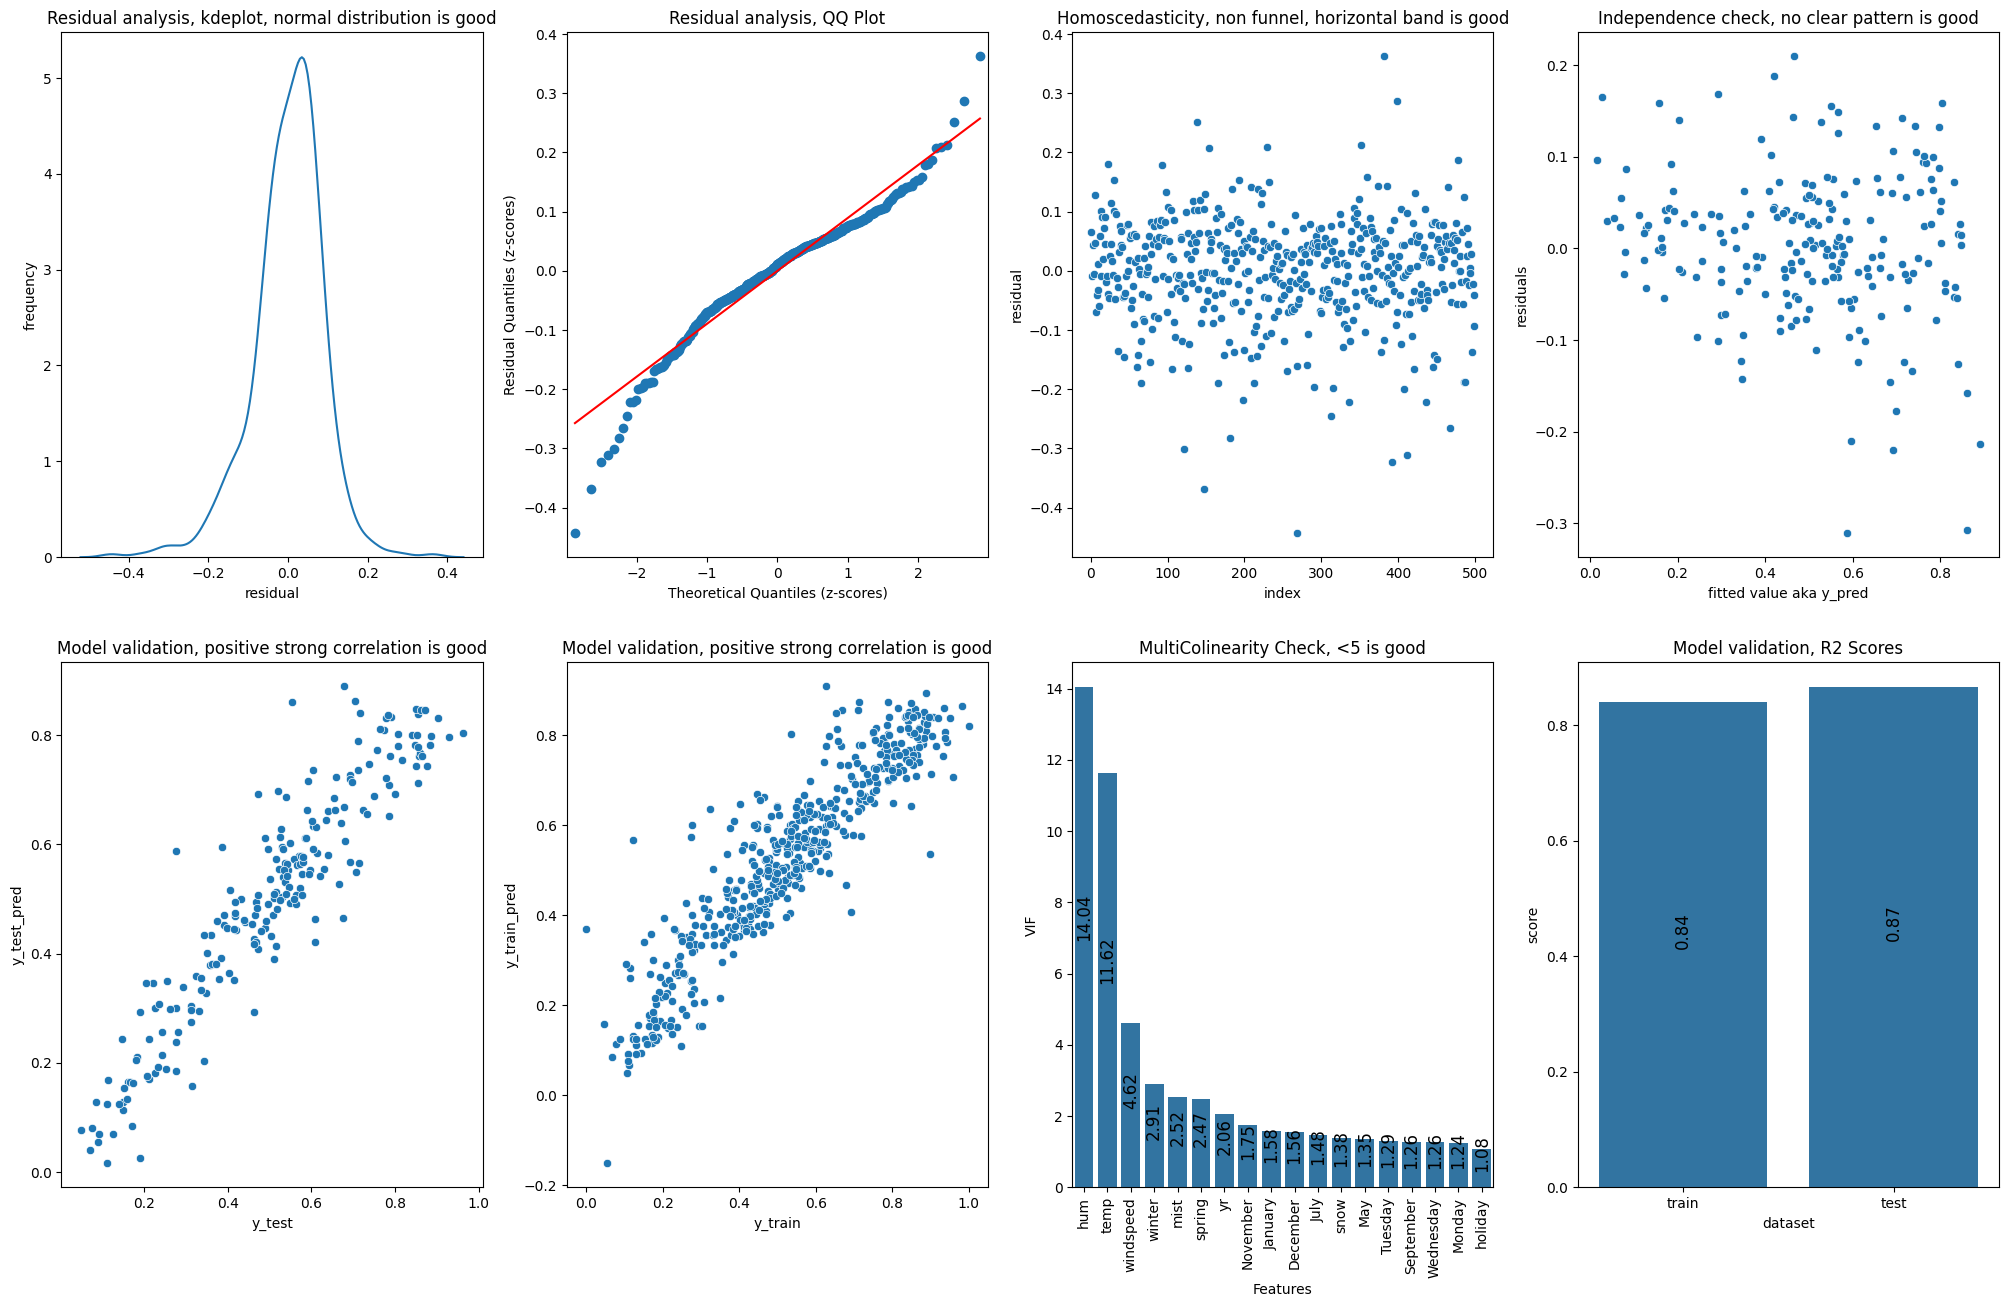

In [100]:
# removing workingday as it has high vif and high p-value
X_var_list = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'spring', 'winter', 'December', 'January', 'July', 'May', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday', 'Wednesday']

y_var = 'cnt'

m3 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.80e-174
Time:                        23:38:26   Log-Likelihood:                 486.40
No. Observations:                 499   AIC:                            -936.8
Df Residuals:                     481   BIC:                            -861.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.027     10.779      0.0

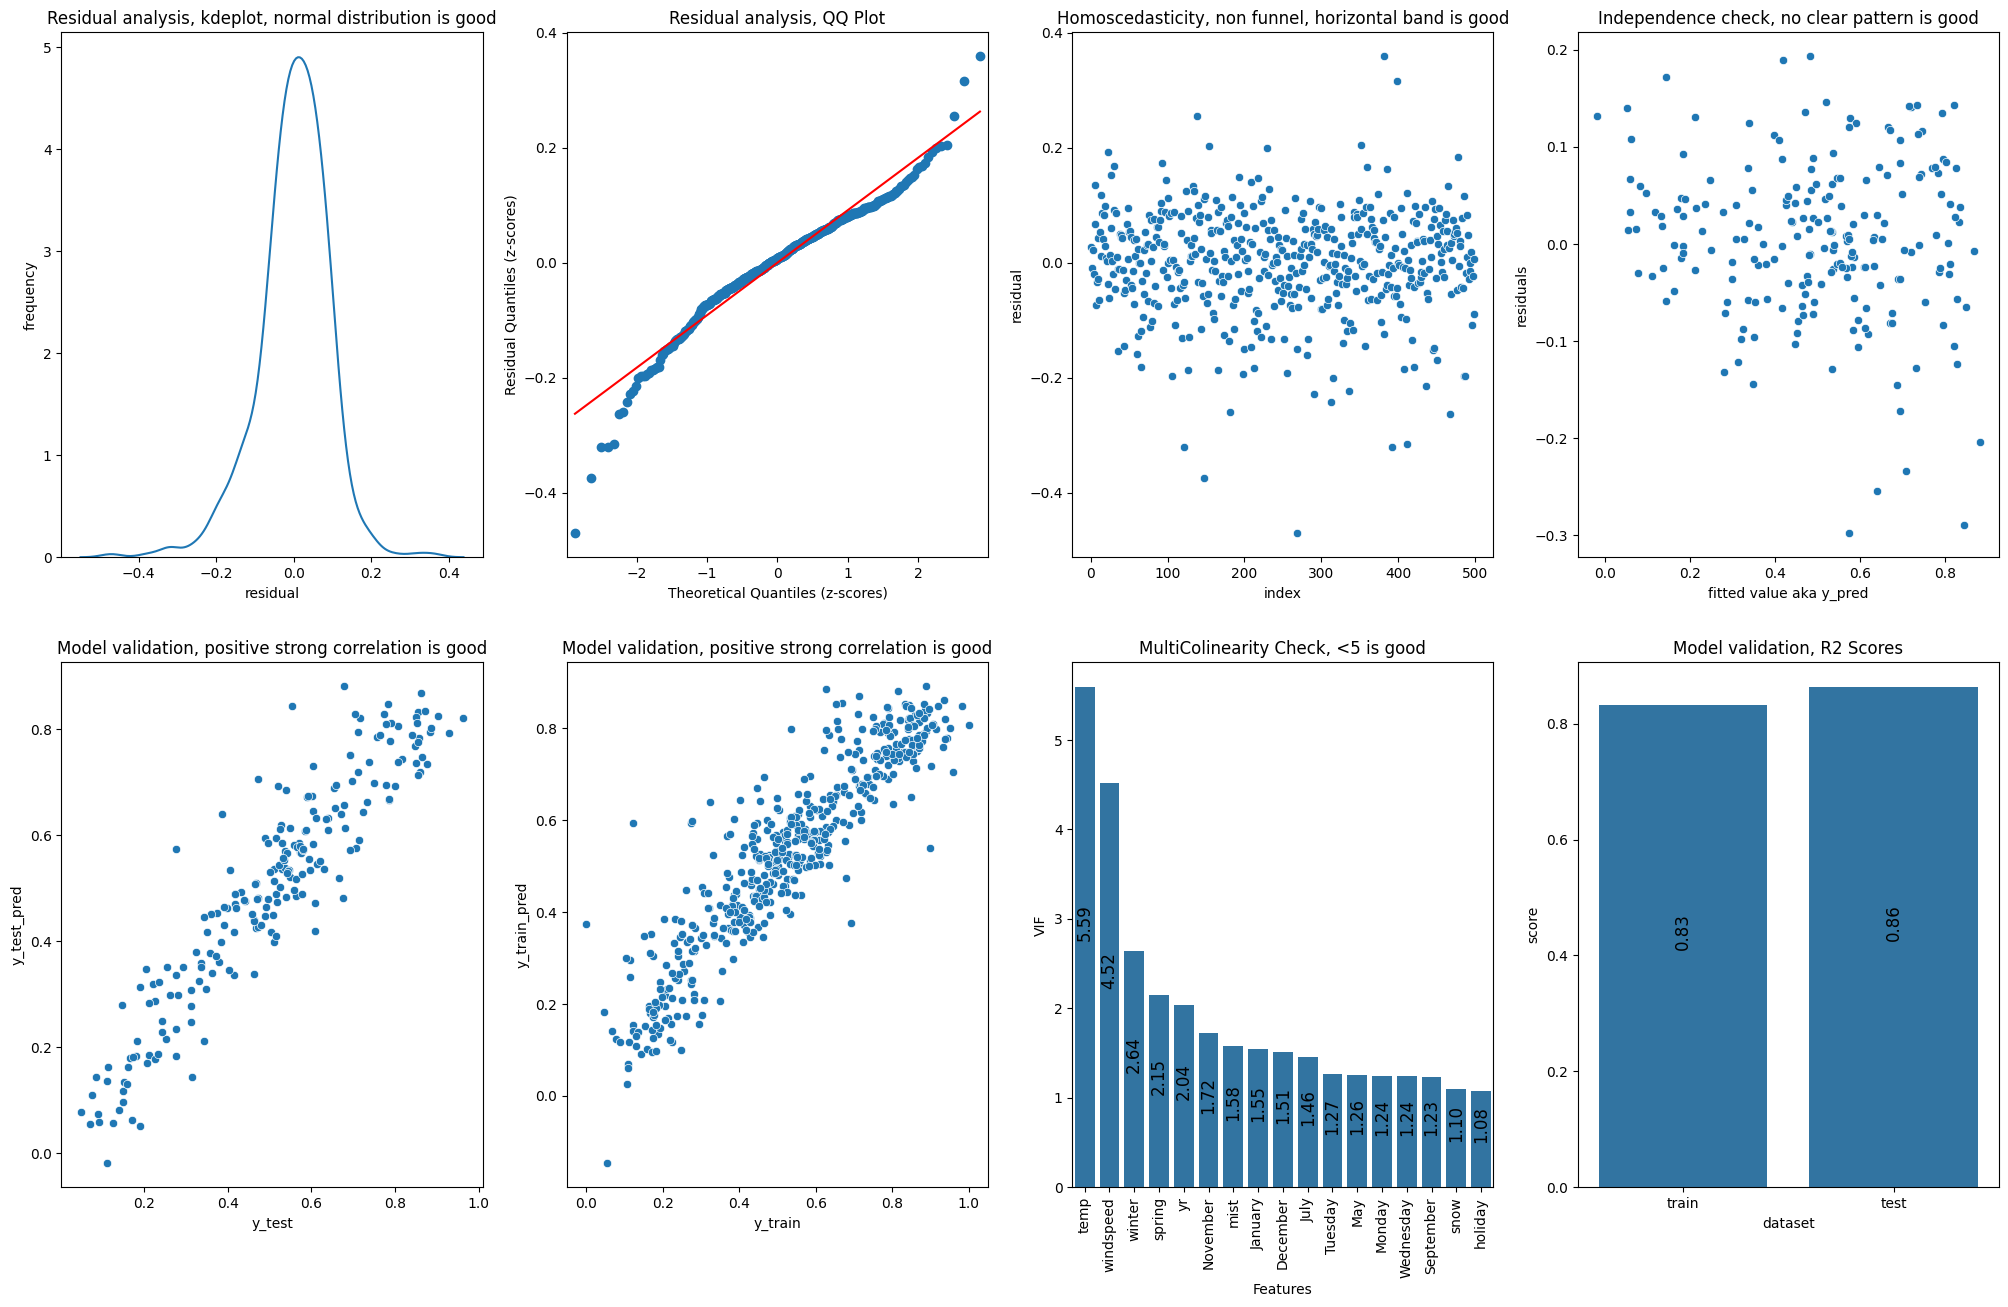

In [101]:
# humidity doesn't seem to have high correlation with cnt, let's try removing humidity
X_var_list = ['yr', 'holiday', 'temp', 'windspeed',
       'spring', 'winter', 'December', 'January', 'July', 'May', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday', 'Wednesday']

y_var = 'cnt'

m4 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.24e-175
Time:                        23:38:34   Log-Likelihood:                 486.02
No. Observations:                 499   AIC:                            -938.0
Df Residuals:                     482   BIC:                            -866.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2911      0.026     11.081      0.0

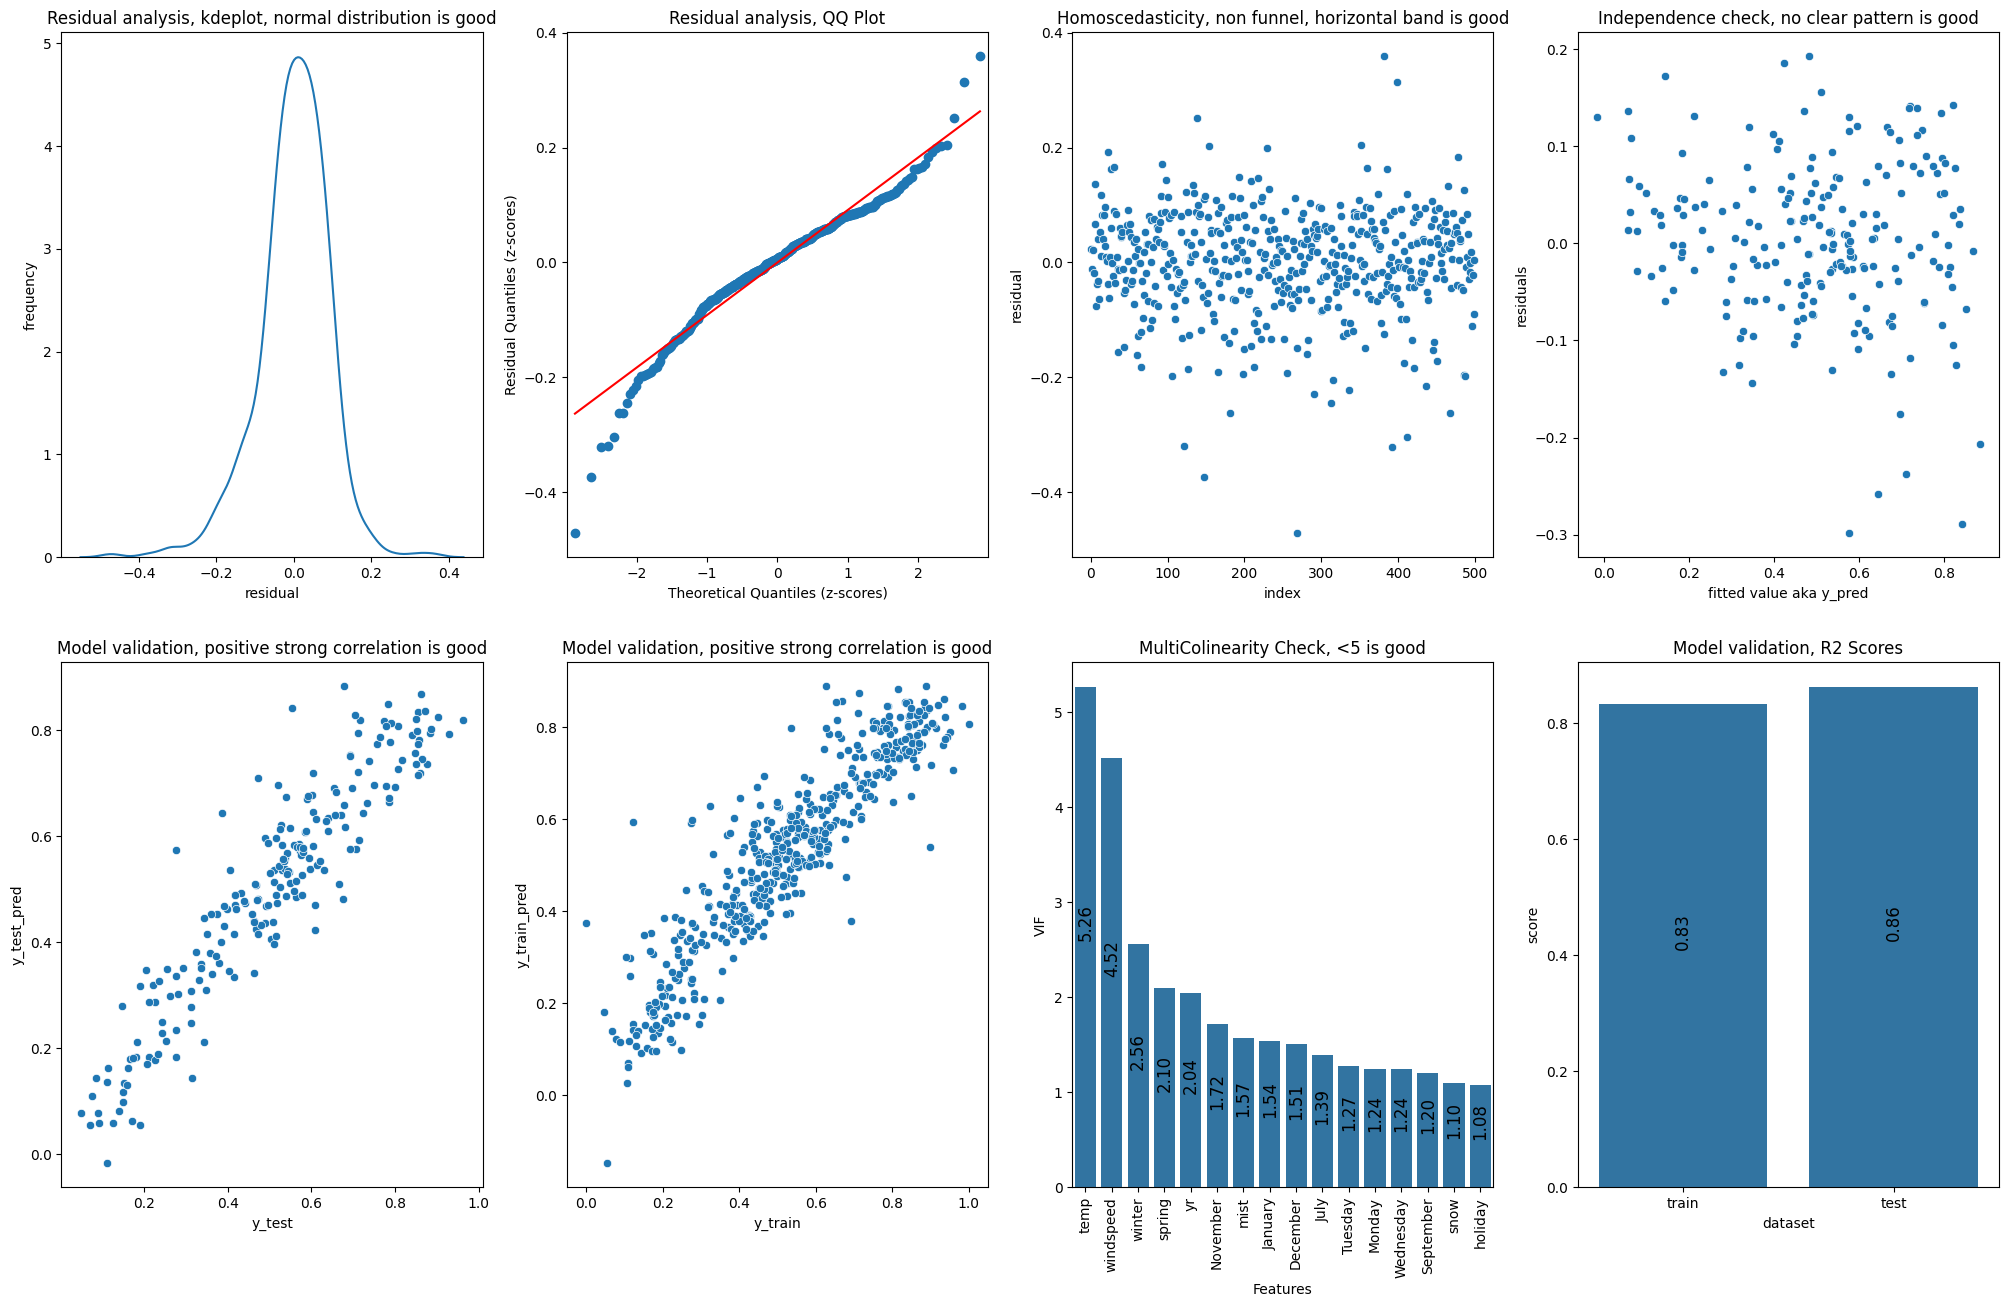

In [102]:
# may has high p-value, let's remove may
X_var_list = ['yr', 'holiday', 'temp', 'windspeed',
       'spring', 'winter', 'December', 'January', 'July', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday', 'Wednesday']

y_var = 'cnt'

m5 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     158.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.01e-175
Time:                        23:38:43   Log-Likelihood:                 484.57
No. Observations:                 499   AIC:                            -937.1
Df Residuals:                     483   BIC:                            -869.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2863      0.026     10.944      0.0

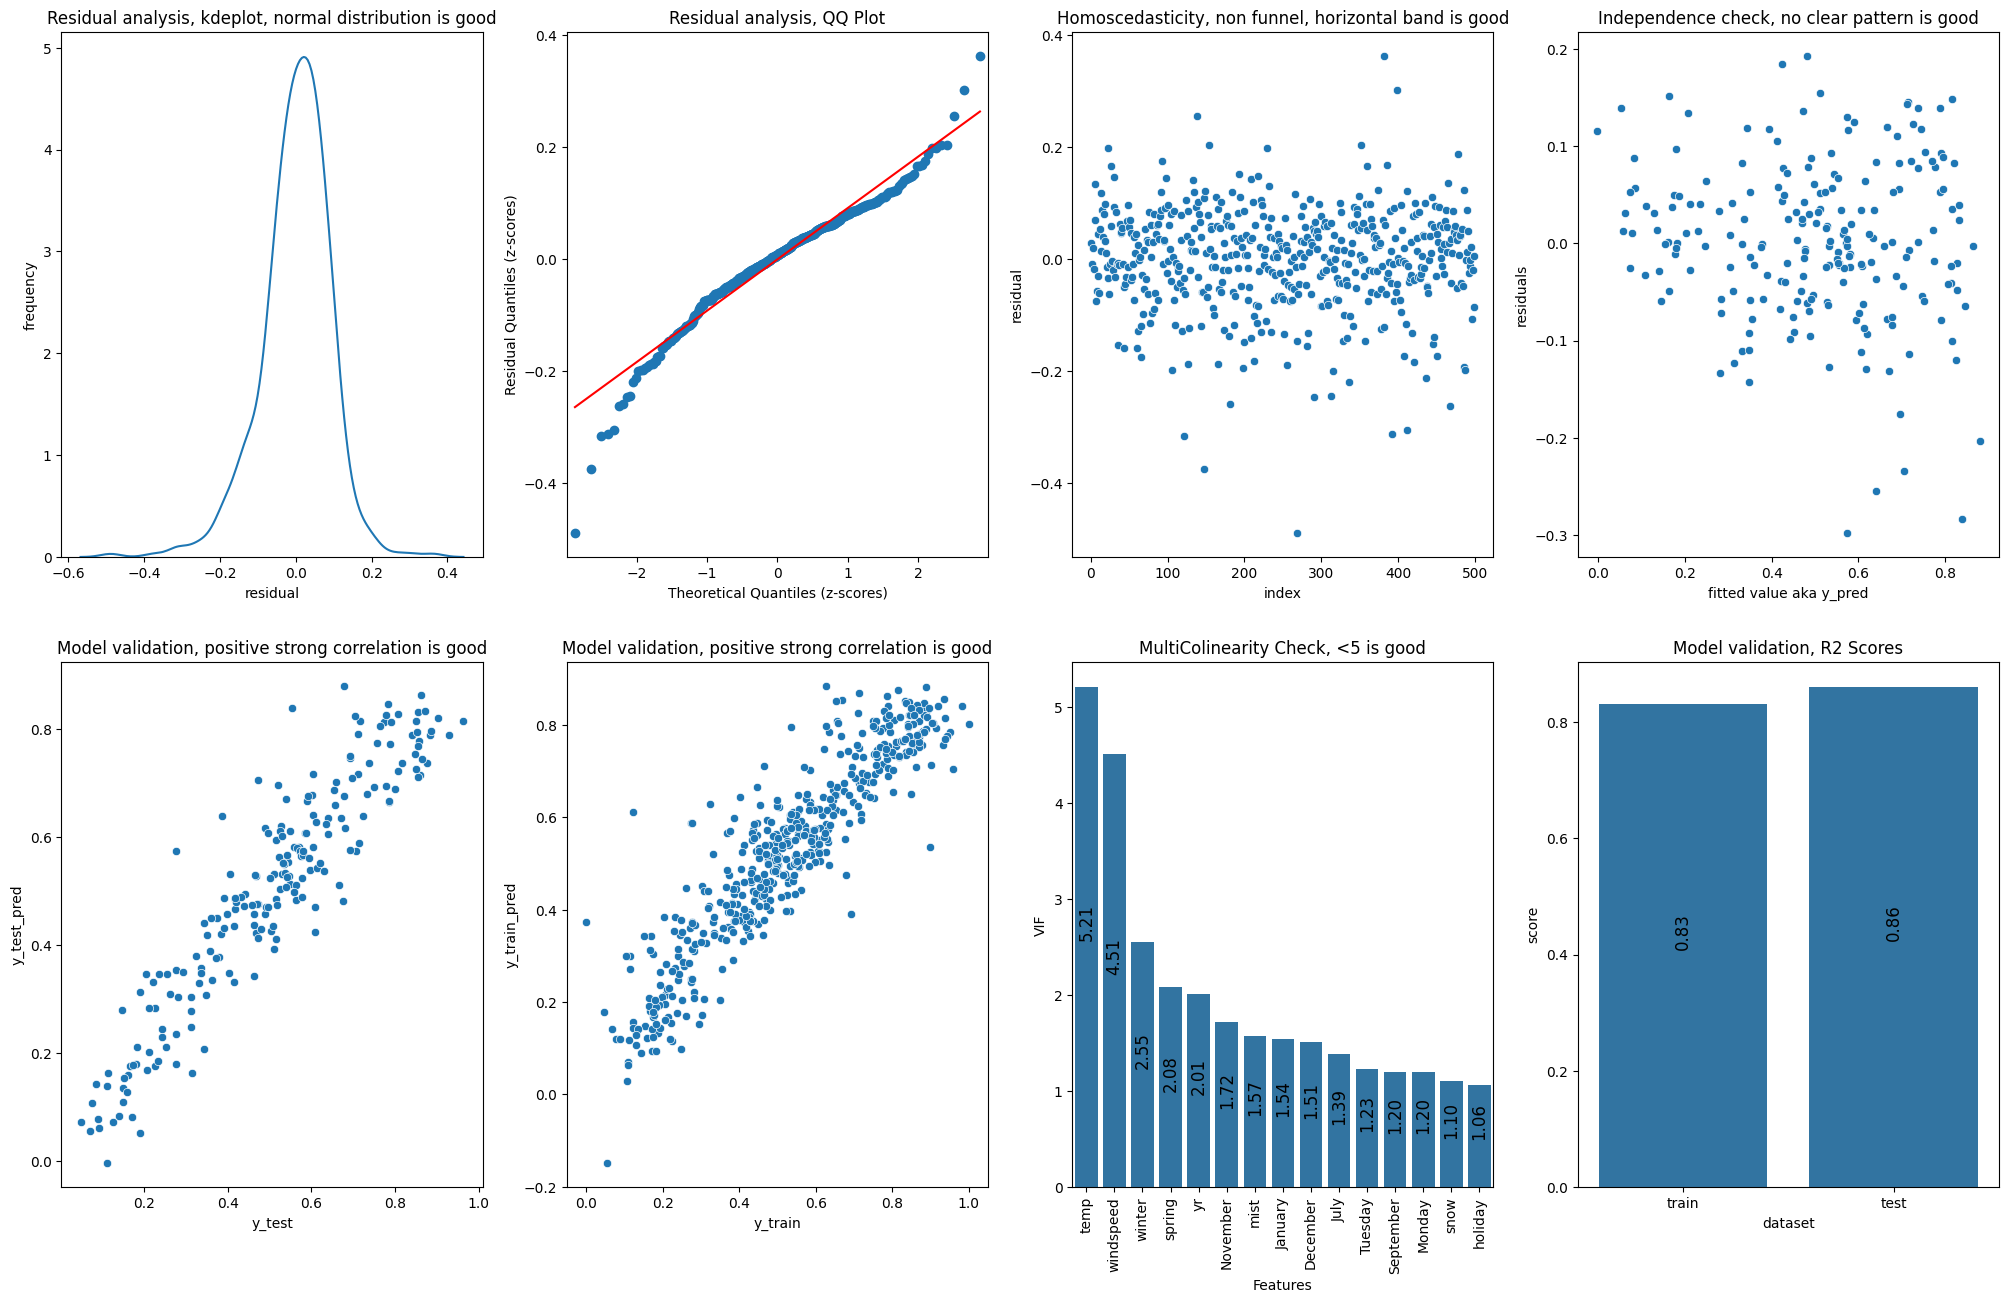

In [103]:
# wednesday has high p-value, let's remove wednesday 
X_var_list = ['yr', 'holiday', 'temp', 'windspeed',
       'spring', 'winter', 'December', 'January', 'July', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday']

y_var = 'cnt'

m6 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     169.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.54e-176
Time:                        23:38:50   Log-Likelihood:                 482.98
No. Observations:                 499   AIC:                            -936.0
Df Residuals:                     484   BIC:                            -872.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2772      0.026     10.786      0.0

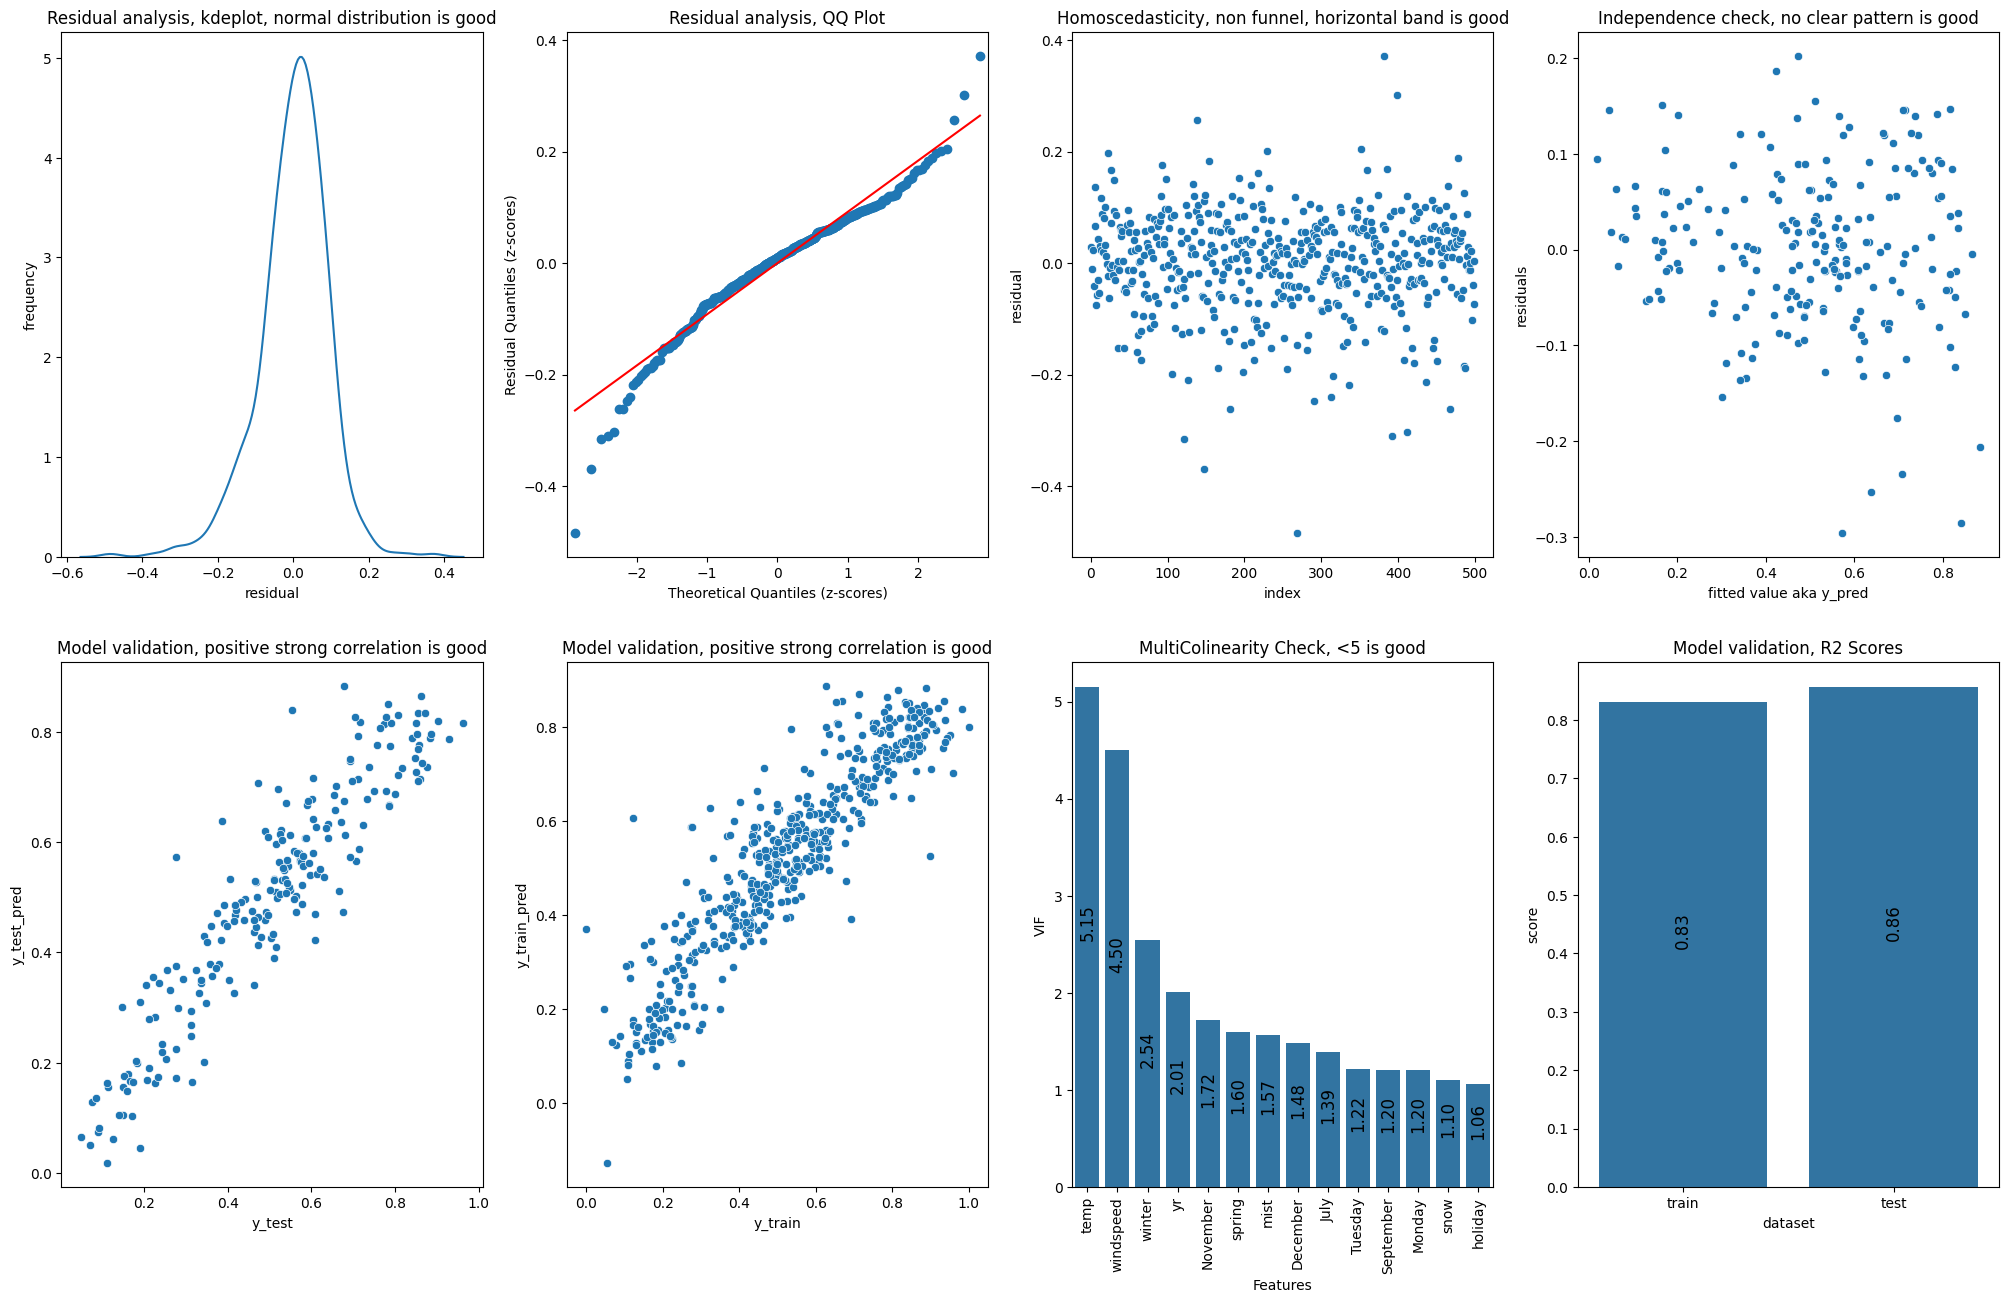

In [104]:
# january has high p-value, let's remove january 
X_var_list = ['yr', 'holiday', 'temp', 'windspeed',
       'spring', 'winter', 'December', 'July', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday']

y_var = 'cnt'

m7 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.58e-174
Time:                        23:38:59   Log-Likelihood:                 476.34
No. Observations:                 499   AIC:                            -924.7
Df Residuals:                     485   BIC:                            -865.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2929      0.026     11.423      0.0

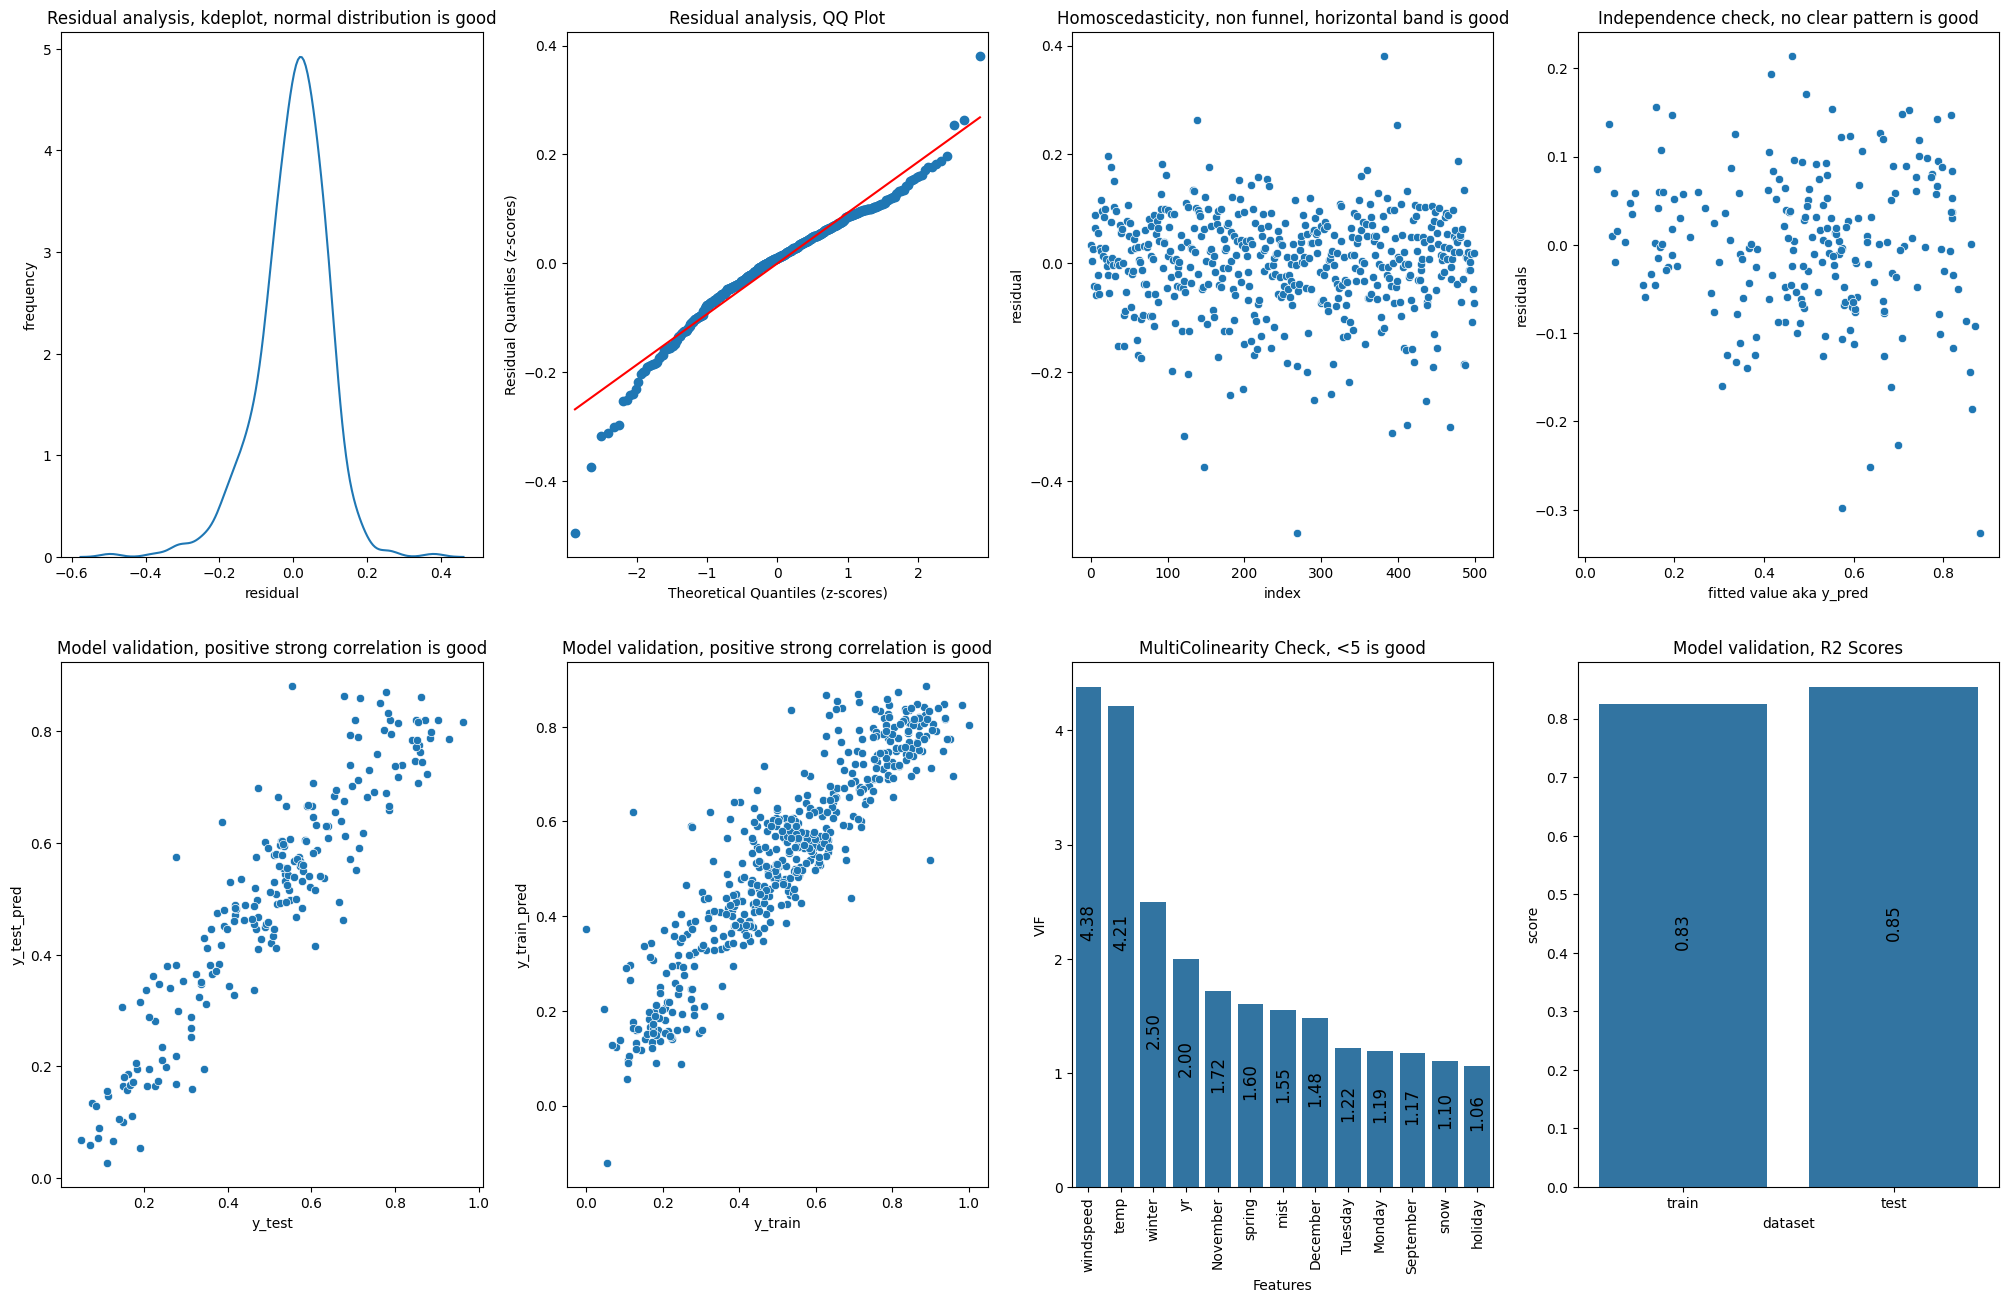

In [105]:
# july has some moderate correlation with temprature, hopefully we should see temprature's vif to drop by removing july.
X_var_list = ['yr', 'holiday', 'temp', 'windspeed',
       'spring', 'winter', 'December', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday']

y_var = 'cnt'

m8 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.18e-174
Time:                        23:39:12   Log-Likelihood:                 472.38
No. Observations:                 499   AIC:                            -918.8
Df Residuals:                     486   BIC:                            -864.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2616      0.023     11.275      0.0

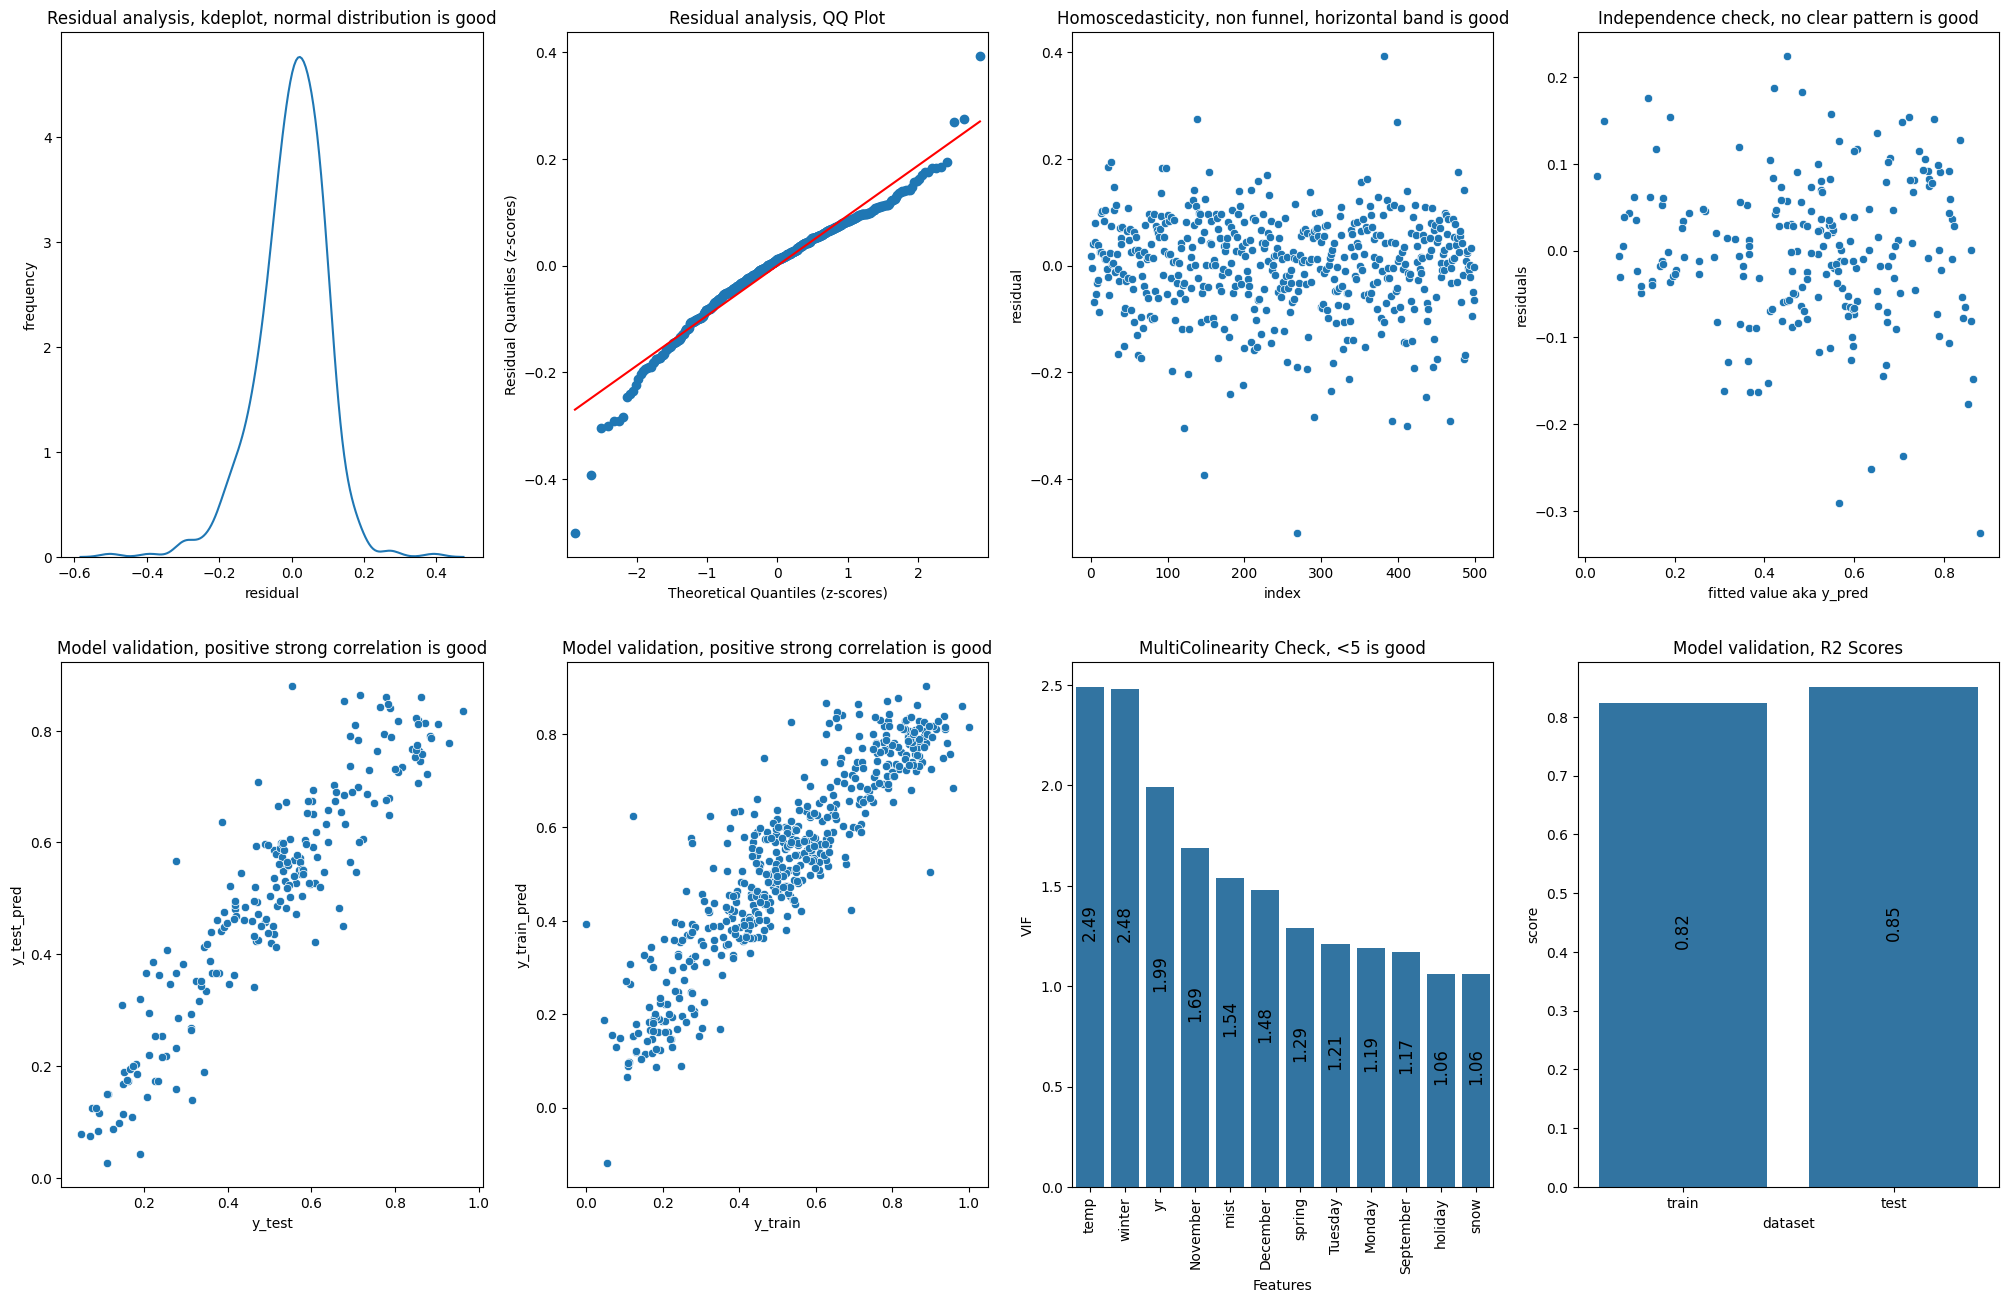

In [106]:
# windspeed seems to have a high VIF, and low correlation with cnt, let's remove windspeed
X_var_list = ['yr', 'holiday', 'temp',
       'spring', 'winter', 'December', 'November',
       'September', 'mist', 'snow', 'Monday', 'Tuesday']

y_var = 'cnt'

m9 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.63e-173
Time:                        23:39:24   Log-Likelihood:                 467.61
No. Observations:                 499   AIC:                            -911.2
Df Residuals:                     487   BIC:                            -860.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2439      0.023     10.763      0.0

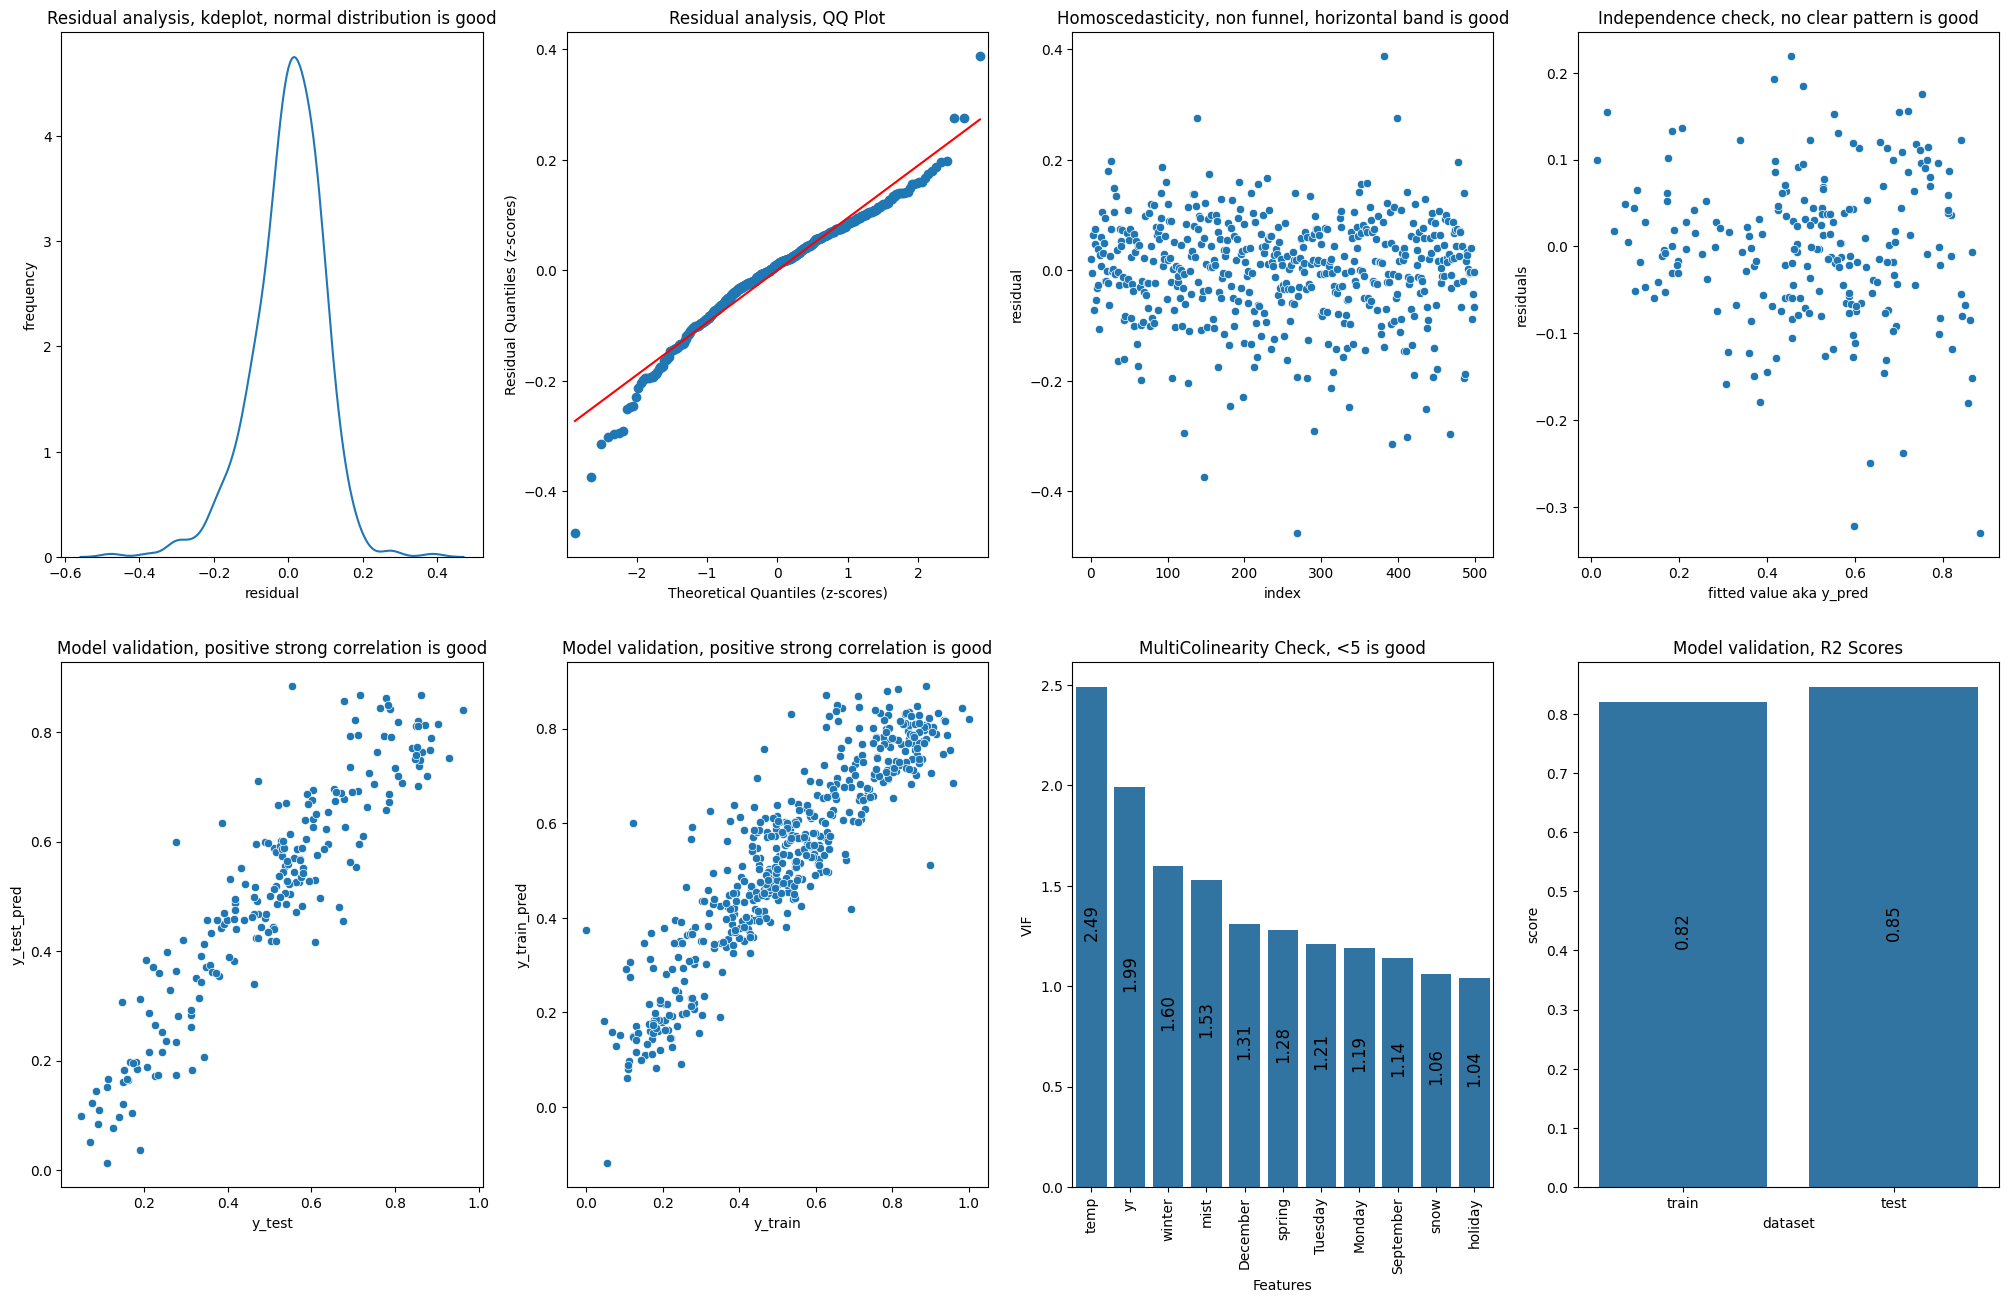

In [107]:
# november seemed to have higher correlation with winter than december, so let's remove november
X_var_list = ['yr', 'holiday', 'temp',
       'spring', 'winter', 'December',
       'September', 'mist', 'snow', 'Monday', 'Tuesday']

y_var = 'cnt'

m10 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.12e-173
Time:                        23:39:36   Log-Likelihood:                 465.37
No. Observations:                 499   AIC:                            -908.7
Df Residuals:                     488   BIC:                            -862.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2375      0.023     10.540      0.0

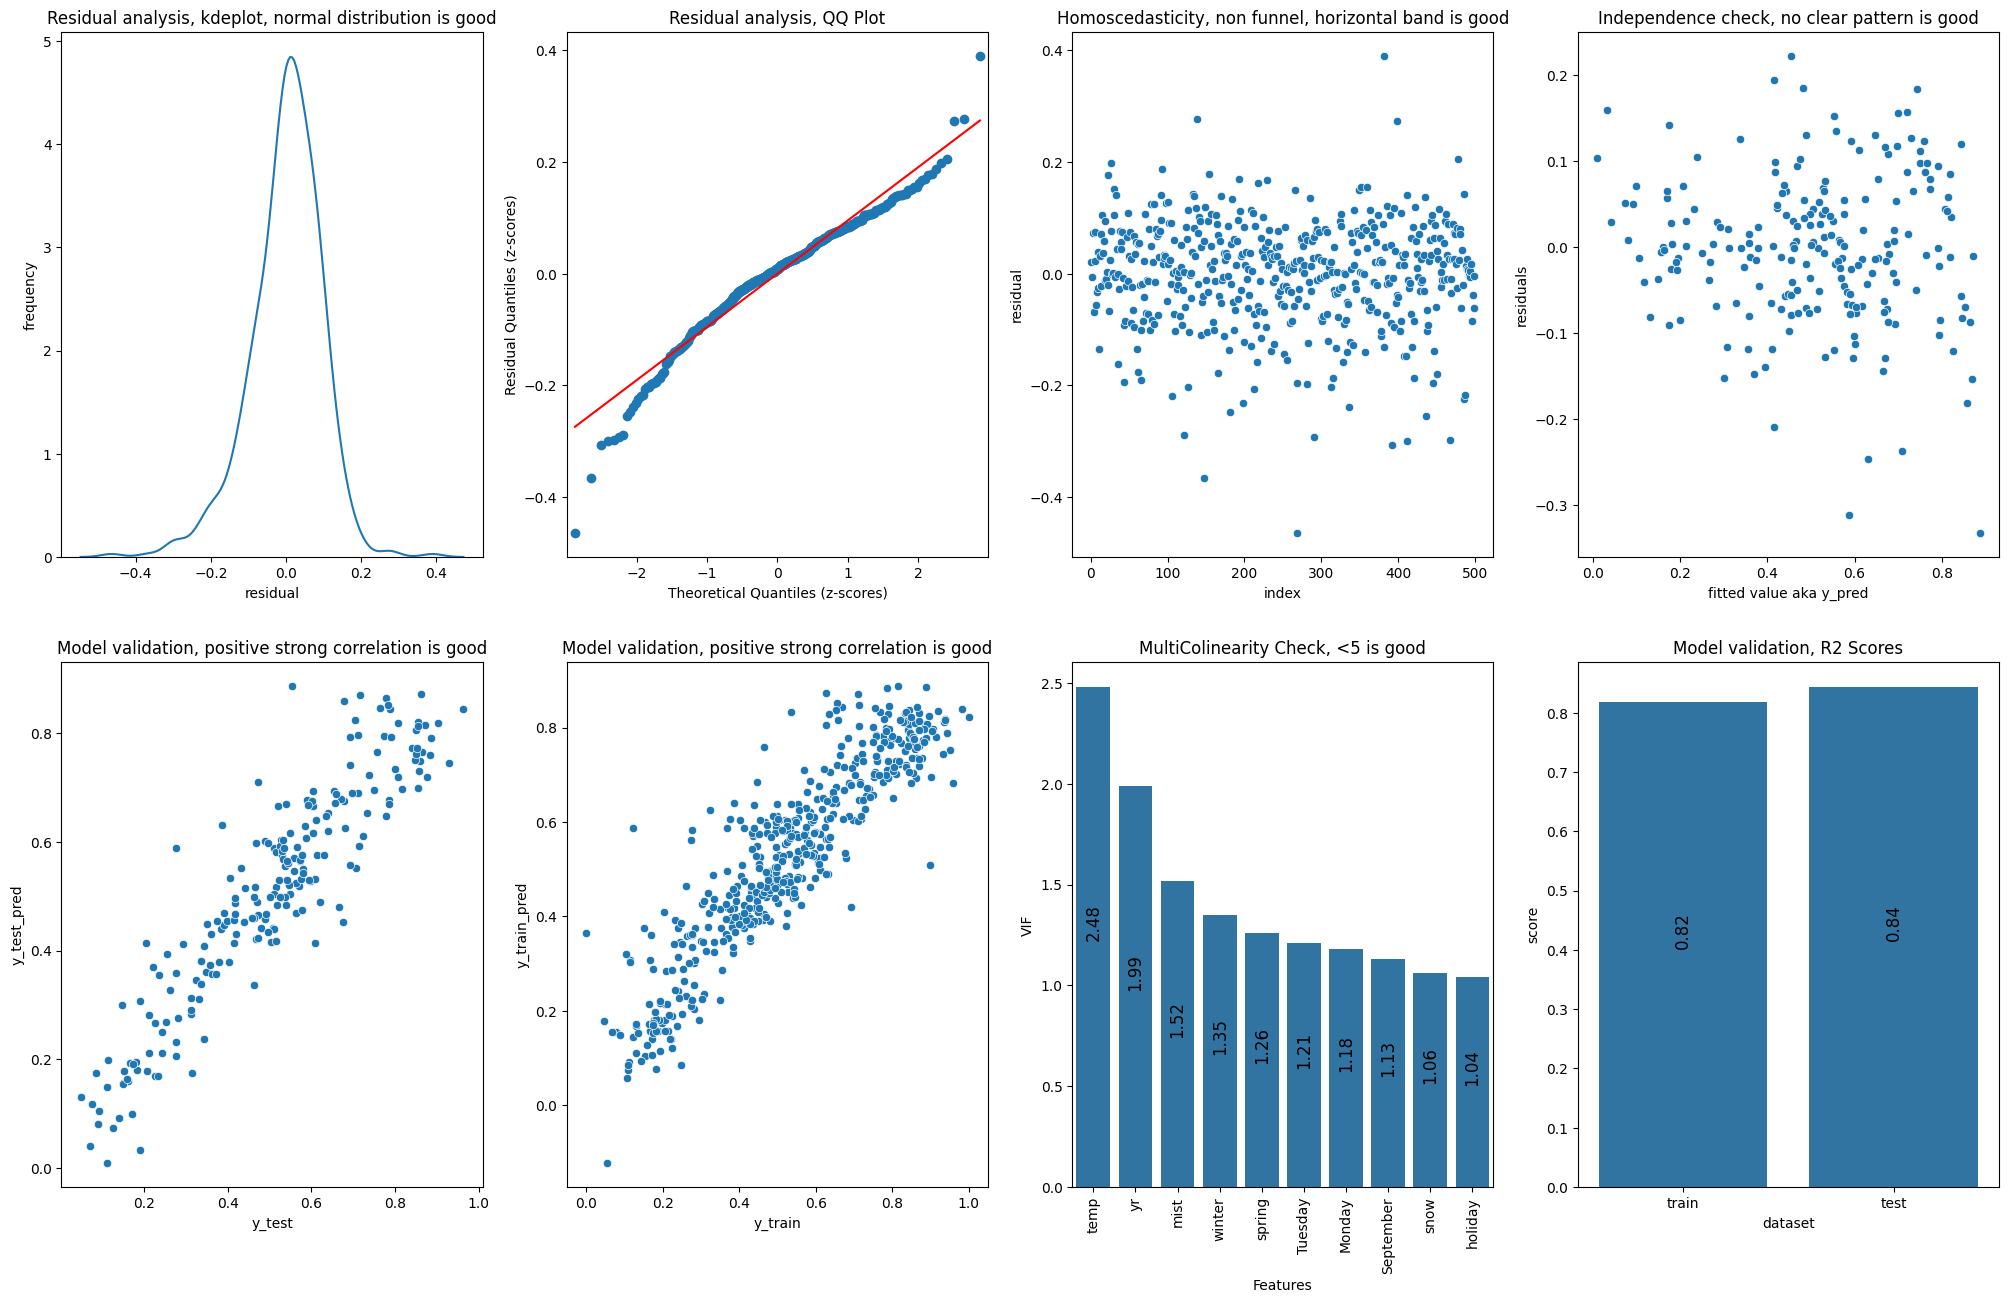

In [108]:
# let's remove december also since it has high correlation with winter
X_var_list = ['yr', 'holiday', 'temp',
       'spring', 'winter',
       'September', 'mist', 'snow', 'Monday', 'Tuesday']

y_var = 'cnt'

m11 = get_model(df_train, df_test, X_var_list, y_var)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     239.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.17e-173
Time:                        23:39:47   Log-Likelihood:                 461.83
No. Observations:                 499   AIC:                            -903.7
Df Residuals:                     489   BIC:                            -861.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2304      0.023     10.238      0.0

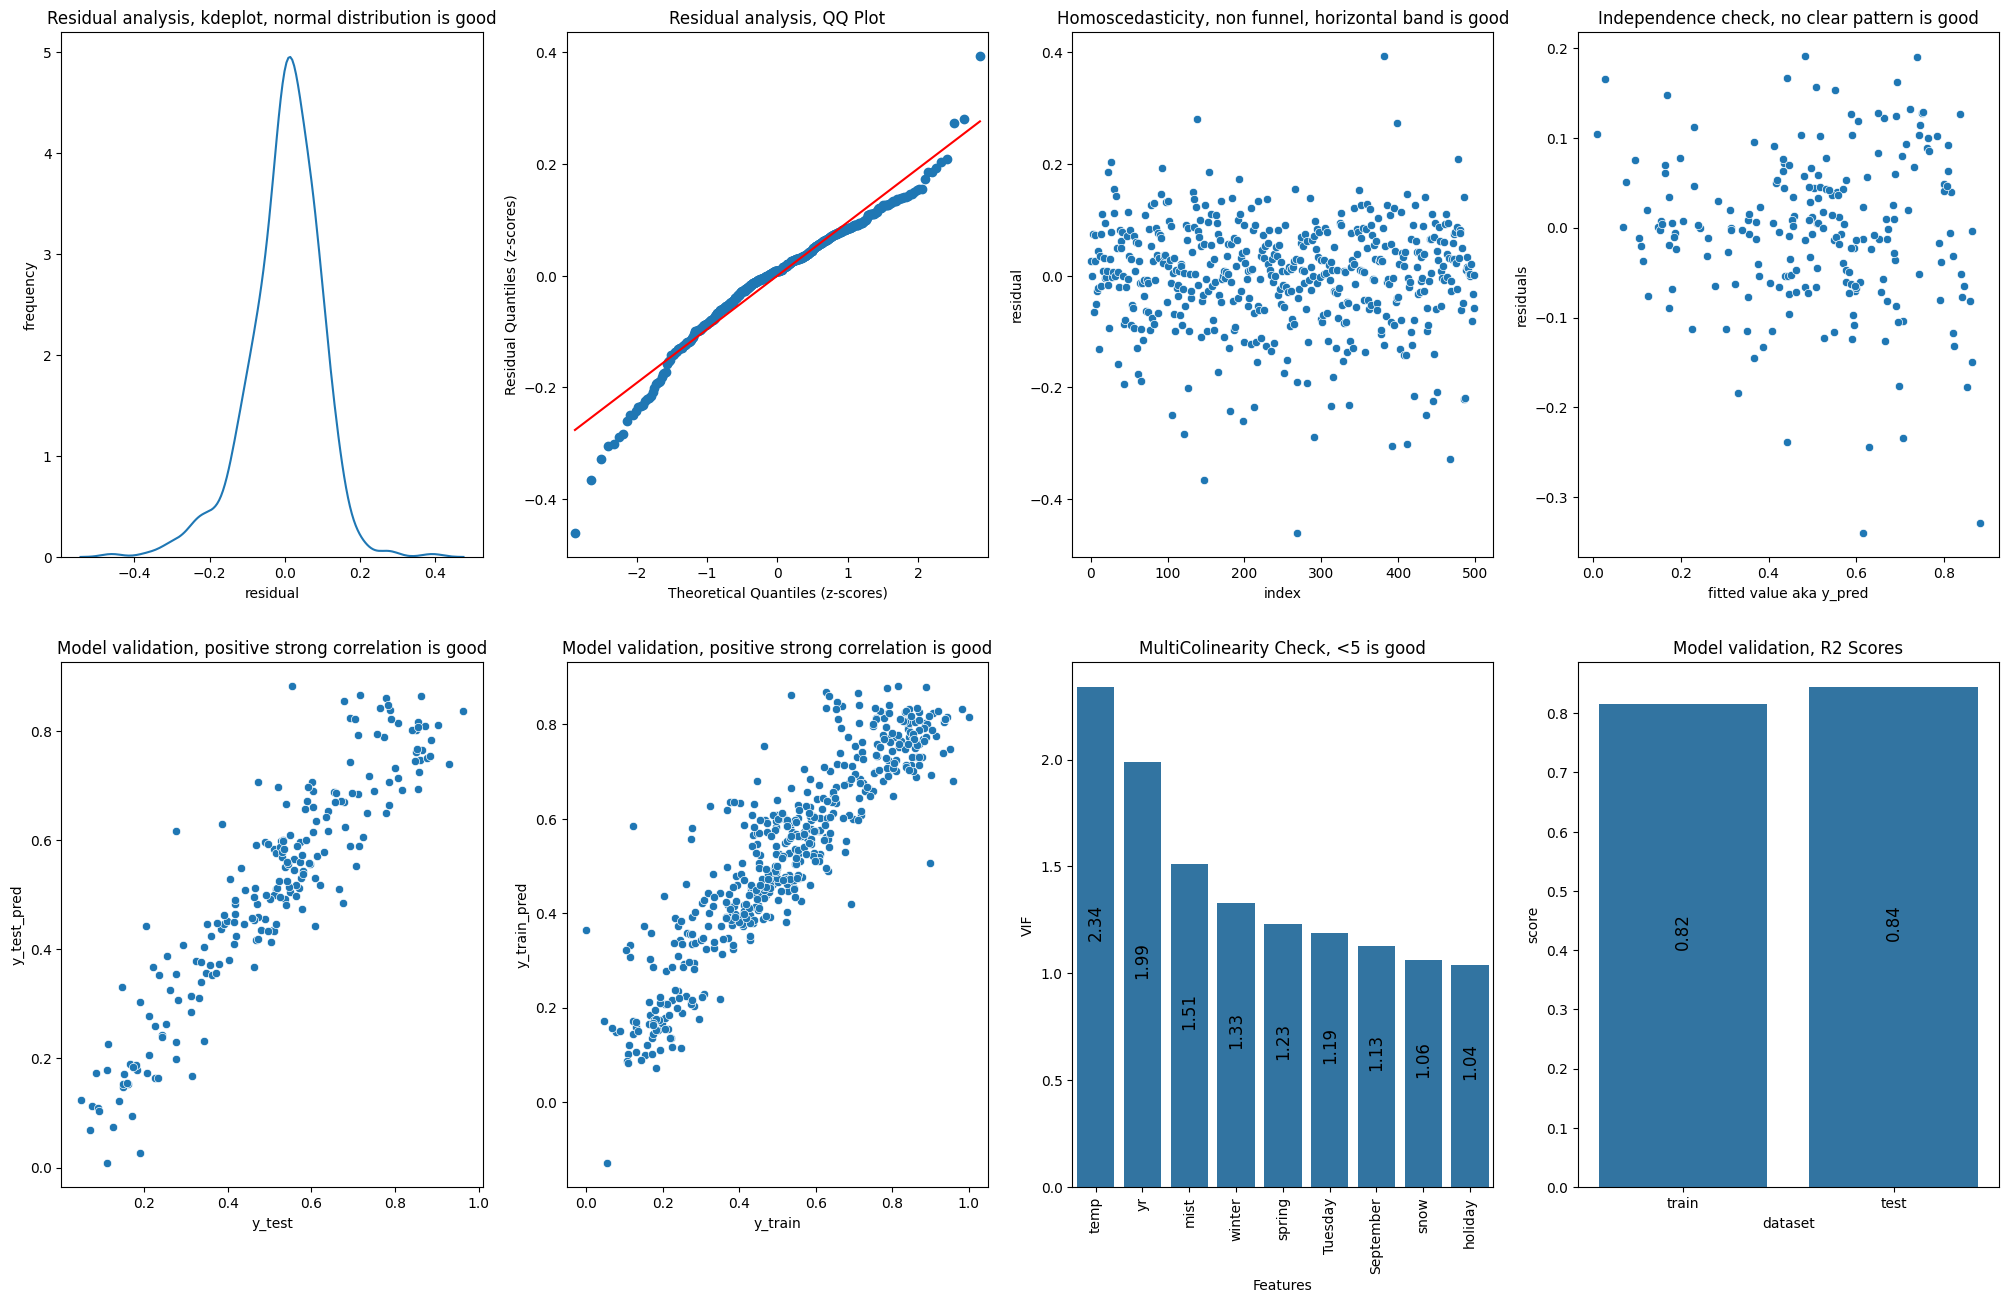

In [109]:
# let's try removing monday
X_var_list = ['yr', 'holiday', 'temp',
       'spring', 'winter',
       'September', 'mist', 'snow', 'Tuesday']

y_var = 'cnt'

m12 = get_model(df_train, df_test, X_var_list, y_var)

# Inferences

* Temperature seems to have a good positive correlation with bike sharing. It’s possible that the USA being a cold country, people would like to use more bike sharing when the temperature goes higher
* Rise in snowfall or rain seems to have a moderately negative correlation with bike sharing. It makes sense that when it snows or rains, people wouldn’t want to ride a bike
* Year by year bike sharing is increasing. It's possible that after the pandemic, people are moving out more and using bikes.
* Since cnt was scaled, we should use `scaler.inverse_transform('cnt')` to get the unscaled value of cnt
* m12 is our final model.
